from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Univariate/TempA/')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

2024-03-09 00:14:35.138094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-09 00:14:35.979877: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-09 00:14:36.316967: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-09 00:14:36.316997: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
epochs = 30

In [3]:
df = pd.read_csv("data/LocationD.csv")

df.drop(columns=["Unnamed: 0", "Date"], inplace=True)

WINDOW_SIZE = 3
TempD = df["TempD"]

X1, y1 = df_to_X_y(TempD, WINDOW_SIZE)
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

# General Model

### CNN

2024-03-09 00:14:55.927679: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-09 00:14:55.927745: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-09 00:14:55.927791: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-09 00:14:55.943083: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
1/8 [==>...........................] - ETA: 8s - loss: 744.3035 - root_mean_squared_error: 27.2819

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 429ms/step - loss: 717.4474 - root_mean_squared_error: 26.7852 - val_loss: 731.0517 - val_root_mean_squared_error: 27.0380
Epoch 2/30
2/8 [======>.......................] - ETA: 0s - loss: 715.8198 - root_mean_squared_error: 26.7548

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 82ms/step - loss: 690.7877 - root_mean_squared_error: 26.2828 - val_loss: 702.8538 - val_root_mean_squared_error: 26.5114
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 669.9407 - root_mean_squared_error: 25.8832

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 148ms/step - loss: 664.4911 - root_mean_squared_error: 25.7777 - val_loss: 675.9862 - val_root_mean_squared_error: 25.9997
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 678.6296 - root_mean_squared_error: 26.0505

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 105ms/step - loss: 639.0154 - root_mean_squared_error: 25.2788 - val_loss: 650.8087 - val_root_mean_squared_error: 25.5110
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 662.0043 - root_mean_squared_error: 25.7294

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 89ms/step - loss: 621.7908 - root_mean_squared_error: 24.9357 - val_loss: 642.1281 - val_root_mean_squared_error: 25.3402
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 615.7293 - root_mean_squared_error: 24.8139

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 196ms/step - loss: 613.6140 - root_mean_squared_error: 24.7712 - val_loss: 633.5974 - val_root_mean_squared_error: 25.1714
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 562.3774 - root_mean_squared_error: 23.7145

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 288ms/step - loss: 605.3737 - root_mean_squared_error: 24.6043 - val_loss: 625.0540 - val_root_mean_squared_error: 25.0011
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 586.1819 - root_mean_squared_error: 24.2112

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 408ms/step - loss: 597.2199 - root_mean_squared_error: 24.4381 - val_loss: 616.4102 - val_root_mean_squared_error: 24.8276
Epoch 9/30
5/8 [=================>............] - ETA: 0s - loss: 596.5560 - root_mean_squared_error: 24.4245

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 271ms/step - loss: 588.9855 - root_mean_squared_error: 24.2690 - val_loss: 607.7700 - val_root_mean_squared_error: 24.6530
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 584.0036 - root_mean_squared_error: 24.1662

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 199ms/step - loss: 580.6732 - root_mean_squared_error: 24.0972 - val_loss: 599.1355 - val_root_mean_squared_error: 24.4772
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 572.7391 - root_mean_squared_error: 23.9320

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 156ms/step - loss: 572.4092 - root_mean_squared_error: 23.9251 - val_loss: 590.4514 - val_root_mean_squared_error: 24.2992
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 542.4675 - root_mean_squared_error: 23.2909

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 252ms/step - loss: 564.0333 - root_mean_squared_error: 23.7494 - val_loss: 581.7702 - val_root_mean_squared_error: 24.1199
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 557.7748 - root_mean_squared_error: 23.6173

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 124ms/step - loss: 555.7316 - root_mean_squared_error: 23.5740 - val_loss: 573.0094 - val_root_mean_squared_error: 23.9376
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 506.0027 - root_mean_squared_error: 22.4945

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 74ms/step - loss: 547.2961 - root_mean_squared_error: 23.3944 - val_loss: 564.2037 - val_root_mean_squared_error: 23.7530
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 587.9304 - root_mean_squared_error: 24.2473

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 90ms/step - loss: 538.8581 - root_mean_squared_error: 23.2133 - val_loss: 555.2702 - val_root_mean_squared_error: 23.5642
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 534.5731 - root_mean_squared_error: 23.1208

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 91ms/step - loss: 530.3154 - root_mean_squared_error: 23.0286 - val_loss: 546.3318 - val_root_mean_squared_error: 23.3737
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 508.6522 - root_mean_squared_error: 22.5533

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 229ms/step - loss: 521.7057 - root_mean_squared_error: 22.8409 - val_loss: 537.3583 - val_root_mean_squared_error: 23.1810
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 513.0959 - root_mean_squared_error: 22.6516

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 381ms/step - loss: 513.0959 - root_mean_squared_error: 22.6516 - val_loss: 528.3509 - val_root_mean_squared_error: 22.9859
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 504.5260 - root_mean_squared_error: 22.4617

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 314ms/step - loss: 504.5260 - root_mean_squared_error: 22.4617 - val_loss: 519.2547 - val_root_mean_squared_error: 22.7872
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 512.6906 - root_mean_squared_error: 22.6427

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 257ms/step - loss: 495.8222 - root_mean_squared_error: 22.2671 - val_loss: 510.2419 - val_root_mean_squared_error: 22.5885
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 487.1477 - root_mean_squared_error: 22.0714

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 297ms/step - loss: 487.1477 - root_mean_squared_error: 22.0714 - val_loss: 501.2356 - val_root_mean_squared_error: 22.3883
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 488.6891 - root_mean_squared_error: 22.1063

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 282ms/step - loss: 478.4765 - root_mean_squared_error: 21.8741 - val_loss: 492.1154 - val_root_mean_squared_error: 22.1837
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 456.5034 - root_mean_squared_error: 21.3659

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 202ms/step - loss: 469.7596 - root_mean_squared_error: 21.6739 - val_loss: 482.9192 - val_root_mean_squared_error: 21.9754
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 423.7350 - root_mean_squared_error: 20.5848

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 160ms/step - loss: 460.8840 - root_mean_squared_error: 21.4682 - val_loss: 473.7877 - val_root_mean_squared_error: 21.7667
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 383.2676 - root_mean_squared_error: 19.5772

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 264ms/step - loss: 452.1446 - root_mean_squared_error: 21.2637 - val_loss: 464.6350 - val_root_mean_squared_error: 21.5554
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 422.7634 - root_mean_squared_error: 20.5612

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 281ms/step - loss: 443.3235 - root_mean_squared_error: 21.0552 - val_loss: 455.3076 - val_root_mean_squared_error: 21.3379
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 434.7278 - root_mean_squared_error: 20.8501

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 332ms/step - loss: 434.4639 - root_mean_squared_error: 20.8438 - val_loss: 446.0131 - val_root_mean_squared_error: 21.1190
Epoch 28/30
3/8 [==========>...................] - ETA: 2s - loss: 418.9660 - root_mean_squared_error: 20.4687

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 727ms/step - loss: 425.5625 - root_mean_squared_error: 20.6292 - val_loss: 436.7502 - val_root_mean_squared_error: 20.8986
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 396.1007 - root_mean_squared_error: 19.9023

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 492ms/step - loss: 416.6355 - root_mean_squared_error: 20.4117 - val_loss: 427.5474 - val_root_mean_squared_error: 20.6772
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 427.7158 - root_mean_squared_error: 20.6813

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 7ms/step


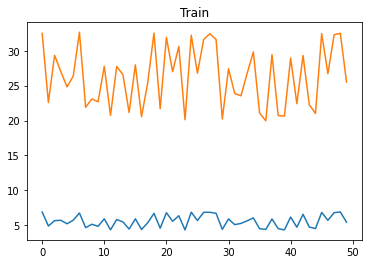

2/2 [==============================] - 0s 16ms/step


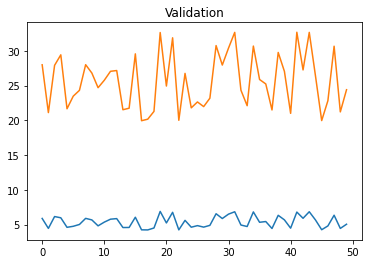

3/3 [==============================] - 0s 16ms/step


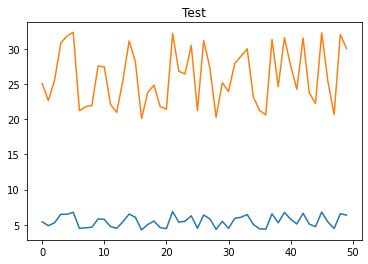

3/3 [==============================] - 0s 19ms/step


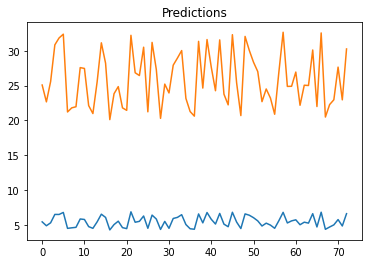

In [4]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 657.9820 - root_mean_squared_error: 25.6512

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 66s 7s/step - loss: 657.7853 - root_mean_squared_error: 25.6473 - val_loss: 680.5436 - val_root_mean_squared_error: 26.0872
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 651.9111 - root_mean_squared_error: 25.5326

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 651.9111 - root_mean_squared_error: 25.5326 - val_loss: 674.6022 - val_root_mean_squared_error: 25.9731
Epoch 3/30
4/8 [==============>...............] - ETA: 0s - loss: 643.9658 - root_mean_squared_error: 25.3765

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 646.0646 - root_mean_squared_error: 25.4178 - val_loss: 668.7067 - val_root_mean_squared_error: 25.8594
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 638.6295 - root_mean_squared_error: 25.2711

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 640.2997 - root_mean_squared_error: 25.3041 - val_loss: 662.8503 - val_root_mean_squared_error: 25.7459
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 634.5430 - root_mean_squared_error: 25.1901

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 634.5430 - root_mean_squared_error: 25.1901 - val_loss: 657.0135 - val_root_mean_squared_error: 25.6323
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 636.1437 - root_mean_squared_error: 25.2219

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 628.8295 - root_mean_squared_error: 25.0765 - val_loss: 651.1770 - val_root_mean_squared_error: 25.5182
Epoch 7/30
5/8 [=================>............] - ETA: 0s - loss: 617.2467 - root_mean_squared_error: 24.8444

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 623.0765 - root_mean_squared_error: 24.9615 - val_loss: 645.3489 - val_root_mean_squared_error: 25.4037
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 611.5340 - root_mean_squared_error: 24.7292

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 617.3373 - root_mean_squared_error: 24.8463 - val_loss: 639.4940 - val_root_mean_squared_error: 25.2882
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 613.1027 - root_mean_squared_error: 24.7609

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 611.5802 - root_mean_squared_error: 24.7301 - val_loss: 633.5939 - val_root_mean_squared_error: 25.1713
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 604.1531 - root_mean_squared_error: 24.5795

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 605.7683 - root_mean_squared_error: 24.6124 - val_loss: 627.6967 - val_root_mean_squared_error: 25.0539
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 597.1951 - root_mean_squared_error: 24.4376

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 599.9638 - root_mean_squared_error: 24.4942 - val_loss: 621.7606 - val_root_mean_squared_error: 24.9351
Epoch 12/30
6/8 [=====================>........] - ETA: 0s - loss: 594.1827 - root_mean_squared_error: 24.3759

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 594.0793 - root_mean_squared_error: 24.3737 - val_loss: 615.7465 - val_root_mean_squared_error: 24.8142
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 588.3912 - root_mean_squared_error: 24.2568

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 588.1522 - root_mean_squared_error: 24.2519 - val_loss: 609.6537 - val_root_mean_squared_error: 24.6912
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 582.1237 - root_mean_squared_error: 24.1272

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 582.1237 - root_mean_squared_error: 24.1272 - val_loss: 603.4944 - val_root_mean_squared_error: 24.5661
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 576.2487 - root_mean_squared_error: 24.0052

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 576.0182 - root_mean_squared_error: 24.0004 - val_loss: 597.2225 - val_root_mean_squared_error: 24.4381
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 573.1073 - root_mean_squared_error: 23.9397

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 569.8032 - root_mean_squared_error: 23.8706 - val_loss: 590.8315 - val_root_mean_squared_error: 24.3070
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 567.6884 - root_mean_squared_error: 23.8262

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 563.4797 - root_mean_squared_error: 23.7377 - val_loss: 584.3203 - val_root_mean_squared_error: 24.1727
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 557.0174 - root_mean_squared_error: 23.6012

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 557.0174 - root_mean_squared_error: 23.6012 - val_loss: 577.6992 - val_root_mean_squared_error: 24.0354
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 571.9169 - root_mean_squared_error: 23.9148

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 550.4244 - root_mean_squared_error: 23.4611 - val_loss: 570.8721 - val_root_mean_squared_error: 23.8929
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 534.2944 - root_mean_squared_error: 23.1148

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 543.6310 - root_mean_squared_error: 23.3159 - val_loss: 563.9089 - val_root_mean_squared_error: 23.7468
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 536.6990 - root_mean_squared_error: 23.1668

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 536.6990 - root_mean_squared_error: 23.1668 - val_loss: 556.7617 - val_root_mean_squared_error: 23.5958
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 532.3477 - root_mean_squared_error: 23.0727

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 529.6374 - root_mean_squared_error: 23.0139 - val_loss: 549.4662 - val_root_mean_squared_error: 23.4407
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 514.1732 - root_mean_squared_error: 22.6754

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 522.3868 - root_mean_squared_error: 22.8558 - val_loss: 542.0546 - val_root_mean_squared_error: 23.2821
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 515.0425 - root_mean_squared_error: 22.6945

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 515.0425 - root_mean_squared_error: 22.6945 - val_loss: 534.4627 - val_root_mean_squared_error: 23.1185
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 515.6720 - root_mean_squared_error: 22.7084

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 507.5539 - root_mean_squared_error: 22.5290 - val_loss: 526.7789 - val_root_mean_squared_error: 22.9517
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 503.2805 - root_mean_squared_error: 22.4339

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 500.0056 - root_mean_squared_error: 22.3608 - val_loss: 519.0393 - val_root_mean_squared_error: 22.7824
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 492.3885 - root_mean_squared_error: 22.1898

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 492.3885 - root_mean_squared_error: 22.1898 - val_loss: 511.2668 - val_root_mean_squared_error: 22.6112
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 484.7402 - root_mean_squared_error: 22.0168

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 484.7402 - root_mean_squared_error: 22.0168 - val_loss: 503.4875 - val_root_mean_squared_error: 22.4385
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 524.0214 - root_mean_squared_error: 22.8915

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 477.1362 - root_mean_squared_error: 21.8434 - val_loss: 495.6510 - val_root_mean_squared_error: 22.2632
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 479.5287 - root_mean_squared_error: 21.8981

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 2s 4ms/step


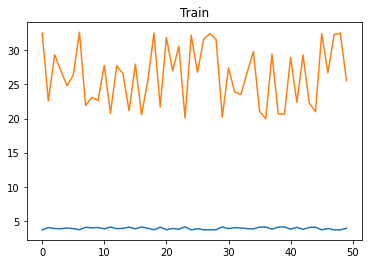

2/2 [==============================] - 1s 5ms/step


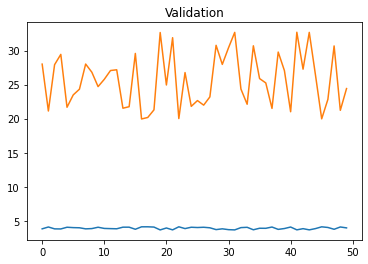

3/3 [==============================] - 0s 9ms/step


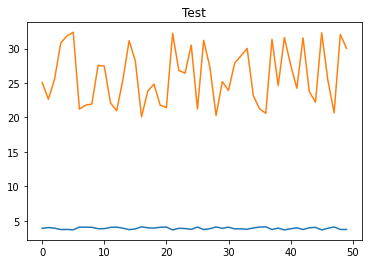

3/3 [==============================] - 0s 3ms/step


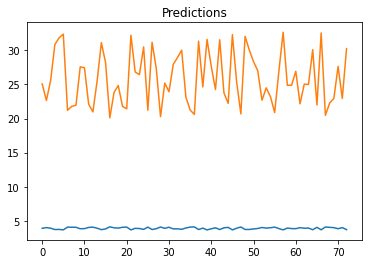

In [5]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/30
5/8 [=================>............] - ETA: 0s - loss: 654.4051 - root_mean_squared_error: 25.5813  

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 3s/step - loss: 653.6169 - root_mean_squared_error: 25.5659 - val_loss: 679.1014 - val_root_mean_squared_error: 26.0596
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 652.6055 - root_mean_squared_error: 25.5461

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 651.9702 - root_mean_squared_error: 25.5337 - val_loss: 677.4277 - val_root_mean_squared_error: 26.0274
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 649.4015 - root_mean_squared_error: 25.4834

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 650.3210 - root_mean_squared_error: 25.5014 - val_loss: 675.7485 - val_root_mean_squared_error: 25.9952
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 648.6653 - root_mean_squared_error: 25.4689

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 648.6653 - root_mean_squared_error: 25.4689 - val_loss: 674.0577 - val_root_mean_squared_error: 25.9626
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 646.9957 - root_mean_squared_error: 25.4361

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 646.9957 - root_mean_squared_error: 25.4361 - val_loss: 672.3529 - val_root_mean_squared_error: 25.9298
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 646.6978 - root_mean_squared_error: 25.4303

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 645.3086 - root_mean_squared_error: 25.4029 - val_loss: 670.6205 - val_root_mean_squared_error: 25.8963
Epoch 7/30
5/8 [=================>............] - ETA: 0s - loss: 651.7385 - root_mean_squared_error: 25.5292

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 643.5862 - root_mean_squared_error: 25.3690 - val_loss: 668.8550 - val_root_mean_squared_error: 25.8622
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 641.8879 - root_mean_squared_error: 25.3355

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 641.8354 - root_mean_squared_error: 25.3345 - val_loss: 667.0579 - val_root_mean_squared_error: 25.8275
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 639.8137 - root_mean_squared_error: 25.2945

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 640.0995 - root_mean_squared_error: 25.3002 - val_loss: 665.4744 - val_root_mean_squared_error: 25.7968
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 637.7946 - root_mean_squared_error: 25.2546

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 2s/step - loss: 638.8218 - root_mean_squared_error: 25.2749 - val_loss: 664.4228 - val_root_mean_squared_error: 25.7764
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 631.1563 - root_mean_squared_error: 25.1228

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 637.9546 - root_mean_squared_error: 25.2578 - val_loss: 663.6305 - val_root_mean_squared_error: 25.7610
Epoch 12/30
6/8 [=====================>........] - ETA: 0s - loss: 642.9507 - root_mean_squared_error: 25.3565

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 637.1987 - root_mean_squared_error: 25.2428 - val_loss: 662.8541 - val_root_mean_squared_error: 25.7460
Epoch 13/30
5/8 [=================>............] - ETA: 0s - loss: 639.4828 - root_mean_squared_error: 25.2880

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 636.4323 - root_mean_squared_error: 25.2276 - val_loss: 662.0380 - val_root_mean_squared_error: 25.7301
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 634.2145 - root_mean_squared_error: 25.1836

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 635.4107 - root_mean_squared_error: 25.2074 - val_loss: 660.4995 - val_root_mean_squared_error: 25.7002
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 634.6188 - root_mean_squared_error: 25.1916

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 633.7020 - root_mean_squared_error: 25.1734 - val_loss: 658.5776 - val_root_mean_squared_error: 25.6628
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 633.3066 - root_mean_squared_error: 25.1656

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 631.7697 - root_mean_squared_error: 25.1350 - val_loss: 656.5735 - val_root_mean_squared_error: 25.6237
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 628.6380 - root_mean_squared_error: 25.0727

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 629.7793 - root_mean_squared_error: 25.0954 - val_loss: 654.5443 - val_root_mean_squared_error: 25.5841
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 627.7623 - root_mean_squared_error: 25.0552

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 627.7623 - root_mean_squared_error: 25.0552 - val_loss: 652.4948 - val_root_mean_squared_error: 25.5440
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 631.9231 - root_mean_squared_error: 25.1381

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 625.7350 - root_mean_squared_error: 25.0147 - val_loss: 650.4167 - val_root_mean_squared_error: 25.5033
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 639.0754 - root_mean_squared_error: 25.2799

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 623.6684 - root_mean_squared_error: 24.9734 - val_loss: 648.3031 - val_root_mean_squared_error: 25.4618
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 623.7682 - root_mean_squared_error: 24.9754

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 621.5609 - root_mean_squared_error: 24.9311 - val_loss: 646.1427 - val_root_mean_squared_error: 25.4193
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 594.5317 - root_mean_squared_error: 24.3830

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 619.4023 - root_mean_squared_error: 24.8878 - val_loss: 643.9205 - val_root_mean_squared_error: 25.3756
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 626.7407 - root_mean_squared_error: 25.0348

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 617.1773 - root_mean_squared_error: 24.8431 - val_loss: 641.6176 - val_root_mean_squared_error: 25.3302
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 614.8632 - root_mean_squared_error: 24.7964

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 614.8632 - root_mean_squared_error: 24.7964 - val_loss: 639.2209 - val_root_mean_squared_error: 25.2828
Epoch 25/30
5/8 [=================>............] - ETA: 0s - loss: 626.1527 - root_mean_squared_error: 25.0230

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 612.4608 - root_mean_squared_error: 24.7479 - val_loss: 636.7167 - val_root_mean_squared_error: 25.2332
Epoch 26/30
6/8 [=====================>........] - ETA: 0s - loss: 606.5294 - root_mean_squared_error: 24.6278

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 609.9333 - root_mean_squared_error: 24.6968 - val_loss: 634.1000 - val_root_mean_squared_error: 25.1813
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 607.3071 - root_mean_squared_error: 24.6436

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 607.3071 - root_mean_squared_error: 24.6436 - val_loss: 631.3567 - val_root_mean_squared_error: 25.1268
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 603.9373 - root_mean_squared_error: 24.5751

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 604.5486 - root_mean_squared_error: 24.5876 - val_loss: 628.4721 - val_root_mean_squared_error: 25.0693
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 588.4680 - root_mean_squared_error: 24.2584

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 601.6531 - root_mean_squared_error: 24.5286 - val_loss: 625.4784 - val_root_mean_squared_error: 25.0096
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 598.6724 - root_mean_squared_error: 24.4678

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 2s 5ms/step


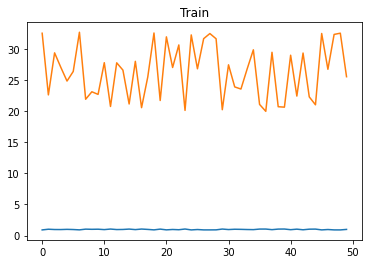

2/2 [==============================] - 1s 7ms/step


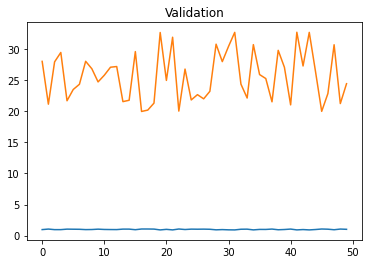

3/3 [==============================] - 0s 4ms/step


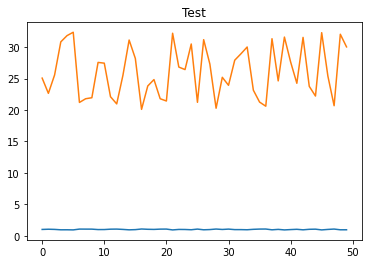

3/3 [==============================] - 0s 3ms/step


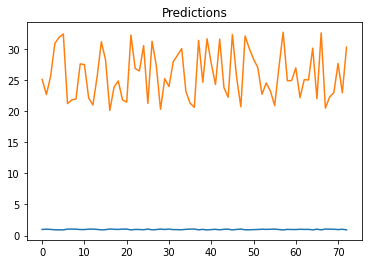

In [6]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/30
6/8 [=====================>........] - ETA: 0s - loss: 655.9345 - root_mean_squared_error: 25.6112 INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 27s 3s/step - loss: 656.1802 - root_mean_squared_error: 25.6160 - val_loss: 678.4452 - val_root_mean_squared_error: 26.0470
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 648.6261 - root_mean_squared_error: 25.4681INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 551ms/step - loss: 649.5420 - root_mean_squared_error: 25.4861 - val_loss: 671.6925 - val_root_mean_squared_error: 25.9170
Epoch 3/30
4/8 [==============>...............] - ETA: 0s - loss: 646.1788 - root_mean_squared_error: 25.4200INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 627ms/step - loss: 642.9024 - root_mean_squared_error: 25.3555 - val_loss: 664.9099 - val_root_mean_squared_error: 25.7858
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 636.2304 - root_mean_squared_error: 25.2236INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 749ms/step - loss: 636.2304 - root_mean_squared_error: 25.2236 - val_loss: 658.0942 - val_root_mean_squared_error: 25.6533
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 687.9348 - root_mean_squared_error: 26.2285INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 909ms/step - loss: 629.5241 - root_mean_squared_error: 25.0903 - val_loss: 651.2465 - val_root_mean_squared_error: 25.5195
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 607.4155 - root_mean_squared_error: 24.6458INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 752ms/step - loss: 622.7412 - root_mean_squared_error: 24.9548 - val_loss: 644.3735 - val_root_mean_squared_error: 25.3845
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 615.9536 - root_mean_squared_error: 24.8184INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 790ms/step - loss: 615.9536 - root_mean_squared_error: 24.8184 - val_loss: 637.3939 - val_root_mean_squared_error: 25.2467
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 609.6669 - root_mean_squared_error: 24.6914INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 609.0517 - root_mean_squared_error: 24.6790 - val_loss: 630.3036 - val_root_mean_squared_error: 25.1058
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 611.8419 - root_mean_squared_error: 24.7354INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 602.0791 - root_mean_squared_error: 24.5373 - val_loss: 623.1273 - val_root_mean_squared_error: 24.9625
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 594.3578 - root_mean_squared_error: 24.3795INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 594.9820 - root_mean_squared_error: 24.3923 - val_loss: 615.8723 - val_root_mean_squared_error: 24.8168
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 587.7827 - root_mean_squared_error: 24.2442INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 854ms/step - loss: 587.7827 - root_mean_squared_error: 24.2442 - val_loss: 608.4291 - val_root_mean_squared_error: 24.6664
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 580.9477 - root_mean_squared_error: 24.1029INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 624ms/step - loss: 580.4051 - root_mean_squared_error: 24.0916 - val_loss: 600.8266 - val_root_mean_squared_error: 24.5118
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 572.8148 - root_mean_squared_error: 23.9335INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 881ms/step - loss: 572.8148 - root_mean_squared_error: 23.9335 - val_loss: 593.0571 - val_root_mean_squared_error: 24.3528
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 565.0975 - root_mean_squared_error: 23.7718INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 565.0975 - root_mean_squared_error: 23.7718 - val_loss: 585.0765 - val_root_mean_squared_error: 24.1884
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 532.9170 - root_mean_squared_error: 23.0850INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 929ms/step - loss: 557.1518 - root_mean_squared_error: 23.6041 - val_loss: 576.9284 - val_root_mean_squared_error: 24.0193
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 549.0551 - root_mean_squared_error: 23.4319INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 549.0551 - root_mean_squared_error: 23.4319 - val_loss: 568.5582 - val_root_mean_squared_error: 23.8445
Epoch 17/30
4/8 [==============>...............] - ETA: 0s - loss: 535.9702 - root_mean_squared_error: 23.1510INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 729ms/step - loss: 540.7070 - root_mean_squared_error: 23.2531 - val_loss: 559.9993 - val_root_mean_squared_error: 23.6643
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 532.1890 - root_mean_squared_error: 23.0692INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 532.1890 - root_mean_squared_error: 23.0692 - val_loss: 551.2406 - val_root_mean_squared_error: 23.4785
Epoch 19/30
5/8 [=================>............] - ETA: 0s - loss: 527.9997 - root_mean_squared_error: 22.9782INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 849ms/step - loss: 523.4758 - root_mean_squared_error: 22.8796 - val_loss: 542.3388 - val_root_mean_squared_error: 23.2882
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 514.6281 - root_mean_squared_error: 22.6854INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 689ms/step - loss: 514.6281 - root_mean_squared_error: 22.6854 - val_loss: 533.3165 - val_root_mean_squared_error: 23.0936
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 508.9896 - root_mean_squared_error: 22.5608INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 813ms/step - loss: 505.7575 - root_mean_squared_error: 22.4891 - val_loss: 524.2290 - val_root_mean_squared_error: 22.8960
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 494.3787 - root_mean_squared_error: 22.2346INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 496.8375 - root_mean_squared_error: 22.2899 - val_loss: 515.2365 - val_root_mean_squared_error: 22.6988
Epoch 23/30
6/8 [=====================>........] - ETA: 0s - loss: 477.6907 - root_mean_squared_error: 21.8561INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 848ms/step - loss: 488.0975 - root_mean_squared_error: 22.0929 - val_loss: 506.4417 - val_root_mean_squared_error: 22.5043
Epoch 24/30
4/8 [==============>...............] - ETA: 0s - loss: 476.0245 - root_mean_squared_error: 21.8180INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 906ms/step - loss: 479.6310 - root_mean_squared_error: 21.9005 - val_loss: 497.9747 - val_root_mean_squared_error: 22.3153
Epoch 25/30
5/8 [=================>............] - ETA: 0s - loss: 473.9967 - root_mean_squared_error: 21.7715INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 703ms/step - loss: 471.5179 - root_mean_squared_error: 21.7145 - val_loss: 489.7992 - val_root_mean_squared_error: 22.1314
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 463.6733 - root_mean_squared_error: 21.5331INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 463.6733 - root_mean_squared_error: 21.5331 - val_loss: 481.9872 - val_root_mean_squared_error: 21.9542
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 456.3552 - root_mean_squared_error: 21.3625INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 841ms/step - loss: 456.2167 - root_mean_squared_error: 21.3592 - val_loss: 474.5315 - val_root_mean_squared_error: 21.7837
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 430.7073 - root_mean_squared_error: 20.7535INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 736ms/step - loss: 449.0694 - root_mean_squared_error: 21.1913 - val_loss: 467.4275 - val_root_mean_squared_error: 21.6201
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 436.2035 - root_mean_squared_error: 20.8855INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 770ms/step - loss: 442.2915 - root_mean_squared_error: 21.0307 - val_loss: 460.5810 - val_root_mean_squared_error: 21.4612
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 435.7430 - root_mean_squared_error: 20.8745INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 7ms/step


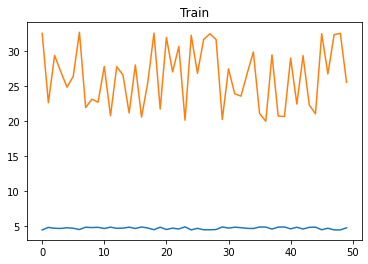

2/2 [==============================] - 0s 6ms/step


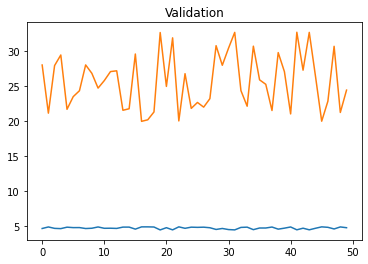

3/3 [==============================] - 0s 6ms/step


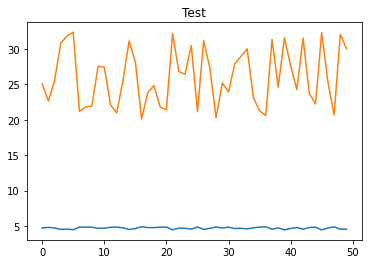

3/3 [==============================] - 0s 3ms/step


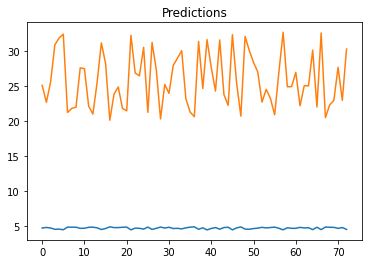

In [7]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [8]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/30
6/8 [=====================>........] - ETA: 0s - loss: 1300.0957 - root_mean_squared_error: 36.0568

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 354ms/step - loss: 1293.4291 - root_mean_squared_error: 35.9643 - val_loss: 1294.3810 - val_root_mean_squared_error: 35.9775
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 1197.1669 - root_mean_squared_error: 34.6001

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 282ms/step - loss: 1197.1669 - root_mean_squared_error: 34.6001 - val_loss: 1211.3853 - val_root_mean_squared_error: 34.8050
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 1063.0959 - root_mean_squared_error: 32.6052

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 263ms/step - loss: 1125.0436 - root_mean_squared_error: 33.5417 - val_loss: 1137.2438 - val_root_mean_squared_error: 33.7230
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 1043.1824 - root_mean_squared_error: 32.2983

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 286ms/step - loss: 1056.4359 - root_mean_squared_error: 32.5029 - val_loss: 1066.0773 - val_root_mean_squared_error: 32.6508
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 1098.2769 - root_mean_squared_error: 33.1403

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 323ms/step - loss: 991.1219 - root_mean_squared_error: 31.4821 - val_loss: 997.9023 - val_root_mean_squared_error: 31.5896
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 928.2403 - root_mean_squared_error: 30.4670

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 478ms/step - loss: 928.2403 - root_mean_squared_error: 30.4670 - val_loss: 933.2934 - val_root_mean_squared_error: 30.5499
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 866.9981 - root_mean_squared_error: 29.4448

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 324ms/step - loss: 868.6270 - root_mean_squared_error: 29.4725 - val_loss: 872.8514 - val_root_mean_squared_error: 29.5441
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 817.3104 - root_mean_squared_error: 28.5886

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 426ms/step - loss: 816.8222 - root_mean_squared_error: 28.5801 - val_loss: 829.8085 - val_root_mean_squared_error: 28.8064
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 778.7953 - root_mean_squared_error: 27.9069

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 398ms/step - loss: 778.8796 - root_mean_squared_error: 27.9084 - val_loss: 791.3707 - val_root_mean_squared_error: 28.1313
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 747.2482 - root_mean_squared_error: 27.3358

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 277ms/step - loss: 748.5632 - root_mean_squared_error: 27.3599 - val_loss: 769.6334 - val_root_mean_squared_error: 27.7423
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 719.8317 - root_mean_squared_error: 26.8297

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 251ms/step - loss: 728.5585 - root_mean_squared_error: 26.9918 - val_loss: 748.6741 - val_root_mean_squared_error: 27.3619
Epoch 12/30
5/8 [=================>............] - ETA: 0s - loss: 718.7877 - root_mean_squared_error: 26.8102

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 295ms/step - loss: 708.9971 - root_mean_squared_error: 26.6270 - val_loss: 728.0377 - val_root_mean_squared_error: 26.9822
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 692.2042 - root_mean_squared_error: 26.3098

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 336ms/step - loss: 689.7031 - root_mean_squared_error: 26.2622 - val_loss: 707.6641 - val_root_mean_squared_error: 26.6020
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 670.7570 - root_mean_squared_error: 25.8990

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 300ms/step - loss: 670.7570 - root_mean_squared_error: 25.8990 - val_loss: 687.9608 - val_root_mean_squared_error: 26.2290
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 668.9924 - root_mean_squared_error: 25.8649

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 6s 801ms/step - loss: 653.2634 - root_mean_squared_error: 25.5590 - val_loss: 677.0801 - val_root_mean_squared_error: 26.0208
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 691.4905 - root_mean_squared_error: 26.2962

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 449ms/step - loss: 648.7009 - root_mean_squared_error: 25.4696 - val_loss: 676.5588 - val_root_mean_squared_error: 26.0107
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 640.4624 - root_mean_squared_error: 25.3074

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 725ms/step - loss: 648.3111 - root_mean_squared_error: 25.4620 - val_loss: 676.1235 - val_root_mean_squared_error: 26.0024
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 647.9404 - root_mean_squared_error: 25.4547

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 502ms/step - loss: 647.9404 - root_mean_squared_error: 25.4547 - val_loss: 675.7286 - val_root_mean_squared_error: 25.9948
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 625.8290 - root_mean_squared_error: 25.0166

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 290ms/step - loss: 647.5824 - root_mean_squared_error: 25.4476 - val_loss: 675.3593 - val_root_mean_squared_error: 25.9877
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 662.2750 - root_mean_squared_error: 25.7347

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 399ms/step - loss: 647.2433 - root_mean_squared_error: 25.4410 - val_loss: 675.0133 - val_root_mean_squared_error: 25.9810
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 626.7997 - root_mean_squared_error: 25.0360

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 326ms/step - loss: 646.9222 - root_mean_squared_error: 25.4347 - val_loss: 674.6907 - val_root_mean_squared_error: 25.9748
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 646.6222 - root_mean_squared_error: 25.4288

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 523ms/step - loss: 646.6222 - root_mean_squared_error: 25.4288 - val_loss: 674.3865 - val_root_mean_squared_error: 25.9690
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 613.8070 - root_mean_squared_error: 24.7751

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 338ms/step - loss: 646.3337 - root_mean_squared_error: 25.4231 - val_loss: 674.0992 - val_root_mean_squared_error: 25.9634
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 653.4629 - root_mean_squared_error: 25.5629

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 646.0637 - root_mean_squared_error: 25.4178 - val_loss: 673.8290 - val_root_mean_squared_error: 25.9582
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 693.0862 - root_mean_squared_error: 26.3265

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 455ms/step - loss: 645.8087 - root_mean_squared_error: 25.4128 - val_loss: 673.5729 - val_root_mean_squared_error: 25.9533
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 645.5655 - root_mean_squared_error: 25.4080

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 448ms/step - loss: 645.5655 - root_mean_squared_error: 25.4080 - val_loss: 673.3322 - val_root_mean_squared_error: 25.9486
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 641.6688 - root_mean_squared_error: 25.3312

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 765ms/step - loss: 645.3373 - root_mean_squared_error: 25.4035 - val_loss: 673.1053 - val_root_mean_squared_error: 25.9443
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 643.9503 - root_mean_squared_error: 25.3762

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 559ms/step - loss: 645.1214 - root_mean_squared_error: 25.3992 - val_loss: 672.8898 - val_root_mean_squared_error: 25.9401
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 671.8318 - root_mean_squared_error: 25.9197

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 453ms/step - loss: 644.9171 - root_mean_squared_error: 25.3952 - val_loss: 672.6779 - val_root_mean_squared_error: 25.9360
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 645.6566 - root_mean_squared_error: 25.4098

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 0s 9ms/step


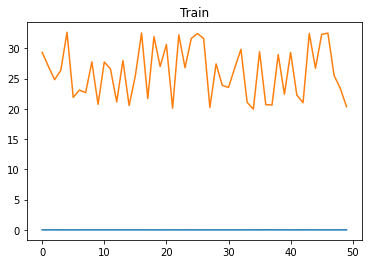

2/2 [==============================] - 0s 4ms/step


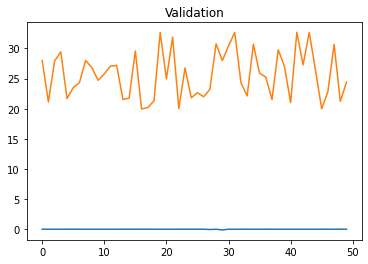

3/3 [==============================] - 0s 121ms/step


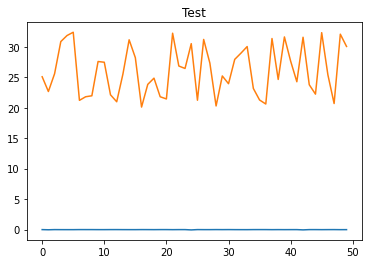

3/3 [==============================] - 0s 5ms/step


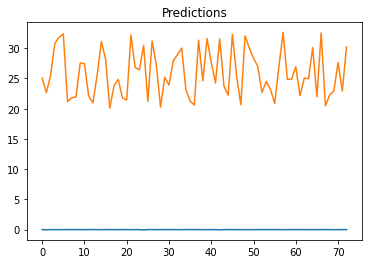

In [9]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 632.1046 - root_mean_squared_error: 25.1417

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 31s 3s/step - loss: 632.1046 - root_mean_squared_error: 25.1417 - val_loss: 655.1067 - val_root_mean_squared_error: 25.5951
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 624.4188 - root_mean_squared_error: 24.9884

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 625.6952 - root_mean_squared_error: 25.0139 - val_loss: 648.6166 - val_root_mean_squared_error: 25.4680
Epoch 3/30
5/8 [=================>............] - ETA: 0s - loss: 608.5055 - root_mean_squared_error: 24.6679

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 619.3240 - root_mean_squared_error: 24.8862 - val_loss: 642.2043 - val_root_mean_squared_error: 25.3418
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 609.9782 - root_mean_squared_error: 24.6977

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 613.0593 - root_mean_squared_error: 24.7600 - val_loss: 635.8560 - val_root_mean_squared_error: 25.2162
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 606.9073 - root_mean_squared_error: 24.6355

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 606.8184 - root_mean_squared_error: 24.6337 - val_loss: 629.5015 - val_root_mean_squared_error: 25.0899
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 600.5862 - root_mean_squared_error: 24.5069

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 600.5862 - root_mean_squared_error: 24.5069 - val_loss: 623.1567 - val_root_mean_squared_error: 24.9631
Epoch 7/30
5/8 [=================>............] - ETA: 0s - loss: 606.3839 - root_mean_squared_error: 24.6249

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 594.3489 - root_mean_squared_error: 24.3793 - val_loss: 616.7859 - val_root_mean_squared_error: 24.8352
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 588.6938 - root_mean_squared_error: 24.2630

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 588.0450 - root_mean_squared_error: 24.2496 - val_loss: 610.4107 - val_root_mean_squared_error: 24.7065
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 581.7743 - root_mean_squared_error: 24.1200

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 2s/step - loss: 581.7743 - root_mean_squared_error: 24.1200 - val_loss: 603.9370 - val_root_mean_squared_error: 24.5751
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 575.3297 - root_mean_squared_error: 23.9860

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 575.3297 - root_mean_squared_error: 23.9860 - val_loss: 597.3788 - val_root_mean_squared_error: 24.4413
Epoch 11/30
2/8 [======>.......................] - ETA: 0s - loss: 563.1218 - root_mean_squared_error: 23.7302

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 568.8340 - root_mean_squared_error: 23.8502 - val_loss: 590.7097 - val_root_mean_squared_error: 24.3045
Epoch 12/30
6/8 [=====================>........] - ETA: 0s - loss: 561.7258 - root_mean_squared_error: 23.7008

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 562.1918 - root_mean_squared_error: 23.7106 - val_loss: 583.9373 - val_root_mean_squared_error: 24.1648
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 555.4832 - root_mean_squared_error: 23.5687

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 555.4832 - root_mean_squared_error: 23.5687 - val_loss: 576.9794 - val_root_mean_squared_error: 24.0204
Epoch 14/30
5/8 [=================>............] - ETA: 0s - loss: 548.5526 - root_mean_squared_error: 23.4212

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 548.5132 - root_mean_squared_error: 23.4204 - val_loss: 569.9272 - val_root_mean_squared_error: 23.8731
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 544.0518 - root_mean_squared_error: 23.3249

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 541.4627 - root_mean_squared_error: 23.2694 - val_loss: 562.6168 - val_root_mean_squared_error: 23.7195
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 546.1393 - root_mean_squared_error: 23.3696

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 534.1750 - root_mean_squared_error: 23.1122 - val_loss: 555.1210 - val_root_mean_squared_error: 23.5610
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 524.6077 - root_mean_squared_error: 22.9043

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 526.6065 - root_mean_squared_error: 22.9479 - val_loss: 547.3724 - val_root_mean_squared_error: 23.3960
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 518.8375 - root_mean_squared_error: 22.7780

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 518.8375 - root_mean_squared_error: 22.7780 - val_loss: 539.3473 - val_root_mean_squared_error: 23.2239
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 517.6573 - root_mean_squared_error: 22.7521

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 510.7677 - root_mean_squared_error: 22.6002 - val_loss: 531.1255 - val_root_mean_squared_error: 23.0462
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 563.0021 - root_mean_squared_error: 23.7277

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 502.4839 - root_mean_squared_error: 22.4162 - val_loss: 522.6819 - val_root_mean_squared_error: 22.8622
Epoch 21/30
1/8 [==>...........................] - ETA: 1s - loss: 512.2577 - root_mean_squared_error: 22.6331

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 493.9614 - root_mean_squared_error: 22.2252 - val_loss: 513.9708 - val_root_mean_squared_error: 22.6709
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 485.1476 - root_mean_squared_error: 22.0261

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 485.1476 - root_mean_squared_error: 22.0261 - val_loss: 505.0803 - val_root_mean_squared_error: 22.4740
Epoch 23/30
6/8 [=====================>........] - ETA: 0s - loss: 486.4866 - root_mean_squared_error: 22.0564

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 476.2530 - root_mean_squared_error: 21.8232 - val_loss: 496.0022 - val_root_mean_squared_error: 22.2711
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 464.1088 - root_mean_squared_error: 21.5432

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 467.1361 - root_mean_squared_error: 21.6133 - val_loss: 486.8835 - val_root_mean_squared_error: 22.0654
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 464.2424 - root_mean_squared_error: 21.5463

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 458.0393 - root_mean_squared_error: 21.4019 - val_loss: 477.6288 - val_root_mean_squared_error: 21.8547
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 447.8567 - root_mean_squared_error: 21.1626

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 448.8741 - root_mean_squared_error: 21.1866 - val_loss: 468.4723 - val_root_mean_squared_error: 21.6442
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 439.9042 - root_mean_squared_error: 20.9739

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 439.9042 - root_mean_squared_error: 20.9739 - val_loss: 459.4434 - val_root_mean_squared_error: 21.4346
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 431.1243 - root_mean_squared_error: 20.7635

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 431.1243 - root_mean_squared_error: 20.7635 - val_loss: 450.6266 - val_root_mean_squared_error: 21.2280
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 422.5278 - root_mean_squared_error: 20.5555

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 422.6209 - root_mean_squared_error: 20.5577 - val_loss: 442.0981 - val_root_mean_squared_error: 21.0261
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 413.2480 - root_mean_squared_error: 20.3285

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 2s 15ms/step


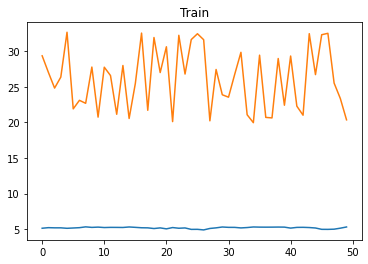

2/2 [==============================] - 1s 9ms/step


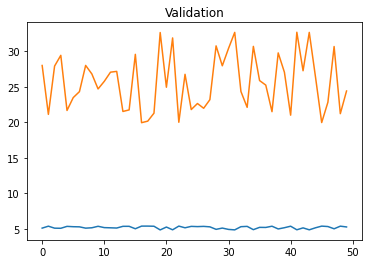

3/3 [==============================] - 0s 6ms/step


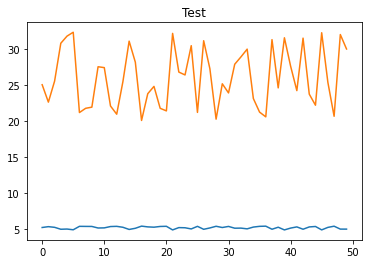

3/3 [==============================] - 0s 7ms/step


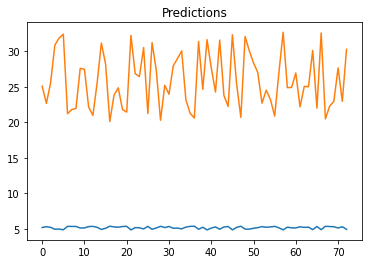

In [10]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/30
5/8 [=================>............] - ETA: 0s - loss: 585.8817 - root_mean_squared_error: 24.2050  

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 39s 4s/step - loss: 597.2912 - root_mean_squared_error: 24.4395 - val_loss: 620.9945 - val_root_mean_squared_error: 24.9198
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 593.7269 - root_mean_squared_error: 24.3665

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 593.7269 - root_mean_squared_error: 24.3665 - val_loss: 617.3658 - val_root_mean_squared_error: 24.8468
Epoch 3/30
5/8 [=================>............] - ETA: 0s - loss: 595.0988 - root_mean_squared_error: 24.3946

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 590.1782 - root_mean_squared_error: 24.2936 - val_loss: 613.7585 - val_root_mean_squared_error: 24.7742
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 581.1990 - root_mean_squared_error: 24.1081

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 586.6383 - root_mean_squared_error: 24.2206 - val_loss: 610.1808 - val_root_mean_squared_error: 24.7018
Epoch 5/30
4/8 [==============>...............] - ETA: 0s - loss: 590.8445 - root_mean_squared_error: 24.3073

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 583.1336 - root_mean_squared_error: 24.1482 - val_loss: 606.6326 - val_root_mean_squared_error: 24.6299
Epoch 6/30
5/8 [=================>............] - ETA: 0s - loss: 579.1027 - root_mean_squared_error: 24.0646

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 579.6560 - root_mean_squared_error: 24.0760 - val_loss: 603.0971 - val_root_mean_squared_error: 24.5580
Epoch 7/30
4/8 [==============>...............] - ETA: 0s - loss: 581.8065 - root_mean_squared_error: 24.1207

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 576.1593 - root_mean_squared_error: 24.0033 - val_loss: 599.5590 - val_root_mean_squared_error: 24.4859
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 568.6523 - root_mean_squared_error: 23.8464

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 572.6724 - root_mean_squared_error: 23.9306 - val_loss: 596.0092 - val_root_mean_squared_error: 24.4133
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 558.8744 - root_mean_squared_error: 23.6405

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 569.1433 - root_mean_squared_error: 23.8567 - val_loss: 592.4445 - val_root_mean_squared_error: 24.3402
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 565.6050 - root_mean_squared_error: 23.7825

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 565.6050 - root_mean_squared_error: 23.7825 - val_loss: 588.8306 - val_root_mean_squared_error: 24.2658
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 560.4710 - root_mean_squared_error: 23.6743

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 562.0313 - root_mean_squared_error: 23.7072 - val_loss: 585.1899 - val_root_mean_squared_error: 24.1907
Epoch 12/30
6/8 [=====================>........] - ETA: 0s - loss: 563.7980 - root_mean_squared_error: 23.7444

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 558.4201 - root_mean_squared_error: 23.6309 - val_loss: 581.4763 - val_root_mean_squared_error: 24.1138
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 554.7510 - root_mean_squared_error: 23.5532

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 554.7510 - root_mean_squared_error: 23.5532 - val_loss: 577.6980 - val_root_mean_squared_error: 24.0353
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 552.8228 - root_mean_squared_error: 23.5122

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 550.9788 - root_mean_squared_error: 23.4729 - val_loss: 573.8543 - val_root_mean_squared_error: 23.9553
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 559.6129 - root_mean_squared_error: 23.6561

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 547.1276 - root_mean_squared_error: 23.3908 - val_loss: 569.9254 - val_root_mean_squared_error: 23.8731
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 544.1520 - root_mean_squared_error: 23.3271

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 543.1938 - root_mean_squared_error: 23.3065 - val_loss: 565.8450 - val_root_mean_squared_error: 23.7875
Epoch 17/30
5/8 [=================>............] - ETA: 0s - loss: 531.7063 - root_mean_squared_error: 23.0588

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 539.1157 - root_mean_squared_error: 23.2189 - val_loss: 561.6320 - val_root_mean_squared_error: 23.6988
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 533.9171 - root_mean_squared_error: 23.1066

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 534.8935 - root_mean_squared_error: 23.1278 - val_loss: 557.3013 - val_root_mean_squared_error: 23.6072
Epoch 19/30
5/8 [=================>............] - ETA: 0s - loss: 518.2690 - root_mean_squared_error: 22.7655

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 530.5547 - root_mean_squared_error: 23.0338 - val_loss: 552.8397 - val_root_mean_squared_error: 23.5125
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 489.9230 - root_mean_squared_error: 22.1342

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 526.0881 - root_mean_squared_error: 22.9366 - val_loss: 548.2376 - val_root_mean_squared_error: 23.4145
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 519.3423 - root_mean_squared_error: 22.7891

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 521.4717 - root_mean_squared_error: 22.8358 - val_loss: 543.4583 - val_root_mean_squared_error: 23.3122
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 514.5049 - root_mean_squared_error: 22.6827

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 516.6760 - root_mean_squared_error: 22.7305 - val_loss: 538.5154 - val_root_mean_squared_error: 23.2059
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 511.7361 - root_mean_squared_error: 22.6216

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 511.7361 - root_mean_squared_error: 22.6216 - val_loss: 533.4011 - val_root_mean_squared_error: 23.0955
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 507.4597 - root_mean_squared_error: 22.5269

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 506.6141 - root_mean_squared_error: 22.5081 - val_loss: 528.1687 - val_root_mean_squared_error: 22.9819
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 501.3784 - root_mean_squared_error: 22.3915

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 501.3784 - root_mean_squared_error: 22.3915 - val_loss: 522.7240 - val_root_mean_squared_error: 22.8632
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 495.8877 - root_mean_squared_error: 22.2685

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 495.8877 - root_mean_squared_error: 22.2685 - val_loss: 517.0994 - val_root_mean_squared_error: 22.7398
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 488.4802 - root_mean_squared_error: 22.1016

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 490.2550 - root_mean_squared_error: 22.1417 - val_loss: 511.2881 - val_root_mean_squared_error: 22.6117
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 480.6672 - root_mean_squared_error: 21.9241

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 484.3844 - root_mean_squared_error: 22.0087 - val_loss: 505.2682 - val_root_mean_squared_error: 22.4782
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 485.8342 - root_mean_squared_error: 22.0416

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 3s/step - loss: 478.3563 - root_mean_squared_error: 21.8714 - val_loss: 498.9868 - val_root_mean_squared_error: 22.3380
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 473.6439 - root_mean_squared_error: 21.7634

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 2s 7ms/step


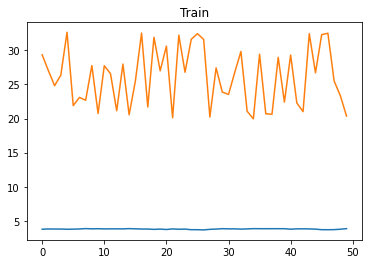

2/2 [==============================] - 2s 5ms/step


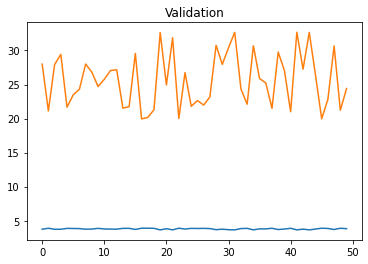

3/3 [==============================] - 0s 34ms/step


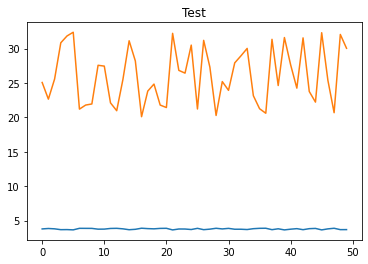

3/3 [==============================] - 0s 4ms/step


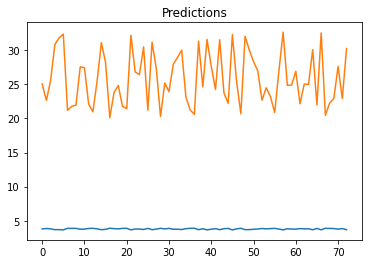

In [11]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 713.1103 - root_mean_squared_error: 26.7041 INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 14s 1s/step - loss: 710.6960 - root_mean_squared_error: 26.6589 - val_loss: 736.2414 - val_root_mean_squared_error: 27.1338
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 704.4506 - root_mean_squared_error: 26.5415INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 704.4506 - root_mean_squared_error: 26.5415 - val_loss: 729.8868 - val_root_mean_squared_error: 27.0164
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 693.3455 - root_mean_squared_error: 26.3315INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 678ms/step - loss: 698.1524 - root_mean_squared_error: 26.4226 - val_loss: 723.4672 - val_root_mean_squared_error: 26.8973
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 693.2087 - root_mean_squared_error: 26.3289INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 685ms/step - loss: 691.8262 - root_mean_squared_error: 26.3026 - val_loss: 716.9642 - val_root_mean_squared_error: 26.7762
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 685.3590 - root_mean_squared_error: 26.1794INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 818ms/step - loss: 685.3590 - root_mean_squared_error: 26.1794 - val_loss: 710.3536 - val_root_mean_squared_error: 26.6525
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 678.8237 - root_mean_squared_error: 26.0542INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 678.8237 - root_mean_squared_error: 26.0542 - val_loss: 703.5762 - val_root_mean_squared_error: 26.5250
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 672.1345 - root_mean_squared_error: 25.9256INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 921ms/step - loss: 672.1345 - root_mean_squared_error: 25.9256 - val_loss: 696.6898 - val_root_mean_squared_error: 26.3949
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 661.0859 - root_mean_squared_error: 25.7116INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 680ms/step - loss: 665.3005 - root_mean_squared_error: 25.7934 - val_loss: 689.6137 - val_root_mean_squared_error: 26.2605
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 659.8288 - root_mean_squared_error: 25.6871INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 726ms/step - loss: 658.2944 - root_mean_squared_error: 25.6572 - val_loss: 682.3858 - val_root_mean_squared_error: 26.1225
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 654.1676 - root_mean_squared_error: 25.5767INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 984ms/step - loss: 651.1572 - root_mean_squared_error: 25.5178 - val_loss: 674.9471 - val_root_mean_squared_error: 25.9797
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 641.6348 - root_mean_squared_error: 25.3305INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 870ms/step - loss: 643.7802 - root_mean_squared_error: 25.3728 - val_loss: 667.3091 - val_root_mean_squared_error: 25.8323
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 623.3162 - root_mean_squared_error: 24.9663INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 875ms/step - loss: 636.2083 - root_mean_squared_error: 25.2232 - val_loss: 659.3764 - val_root_mean_squared_error: 25.6783
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 628.3890 - root_mean_squared_error: 25.0677INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 620ms/step - loss: 628.3890 - root_mean_squared_error: 25.0677 - val_loss: 651.1926 - val_root_mean_squared_error: 25.5185
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 623.7952 - root_mean_squared_error: 24.9759INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 733ms/step - loss: 620.2762 - root_mean_squared_error: 24.9053 - val_loss: 642.7745 - val_root_mean_squared_error: 25.3530
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 611.8788 - root_mean_squared_error: 24.7362INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 844ms/step - loss: 611.8788 - root_mean_squared_error: 24.7362 - val_loss: 634.0944 - val_root_mean_squared_error: 25.1812
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 598.0508 - root_mean_squared_error: 24.4551INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 603.2116 - root_mean_squared_error: 24.5604 - val_loss: 625.2075 - val_root_mean_squared_error: 25.0041
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 563.7378 - root_mean_squared_error: 23.7432INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 670ms/step - loss: 594.2647 - root_mean_squared_error: 24.3775 - val_loss: 616.1465 - val_root_mean_squared_error: 24.8223
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 574.5379 - root_mean_squared_error: 23.9695INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 792ms/step - loss: 585.1914 - root_mean_squared_error: 24.1907 - val_loss: 607.0746 - val_root_mean_squared_error: 24.6389
Epoch 19/30
4/8 [==============>...............] - ETA: 0s - loss: 583.9592 - root_mean_squared_error: 24.1652INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 576.0394 - root_mean_squared_error: 24.0008 - val_loss: 598.0463 - val_root_mean_squared_error: 24.4550
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 566.5135 - root_mean_squared_error: 23.8015INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 566.8989 - root_mean_squared_error: 23.8096 - val_loss: 589.0853 - val_root_mean_squared_error: 24.2711
Epoch 21/30
1/8 [==>...........................] - ETA: 1s - loss: 605.1130 - root_mean_squared_error: 24.5990INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 557.8568 - root_mean_squared_error: 23.6190 - val_loss: 580.2212 - val_root_mean_squared_error: 24.0878
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 548.9119 - root_mean_squared_error: 23.4289INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 836ms/step - loss: 548.9119 - root_mean_squared_error: 23.4289 - val_loss: 571.4698 - val_root_mean_squared_error: 23.9054
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 521.6389 - root_mean_squared_error: 22.8394INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 540.1519 - root_mean_squared_error: 23.2412 - val_loss: 562.7319 - val_root_mean_squared_error: 23.7220
Epoch 24/30
6/8 [=====================>........] - ETA: 0s - loss: 540.7344 - root_mean_squared_error: 23.2537INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 814ms/step - loss: 531.3929 - root_mean_squared_error: 23.0520 - val_loss: 553.9839 - val_root_mean_squared_error: 23.5369
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 522.6154 - root_mean_squared_error: 22.8608INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 596ms/step - loss: 522.6154 - root_mean_squared_error: 22.8608 - val_loss: 545.2032 - val_root_mean_squared_error: 23.3496
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 556.5280 - root_mean_squared_error: 23.5908INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 711ms/step - loss: 513.7549 - root_mean_squared_error: 22.6662 - val_loss: 536.2551 - val_root_mean_squared_error: 23.1572
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 522.7465 - root_mean_squared_error: 22.8636INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 972ms/step - loss: 504.7439 - root_mean_squared_error: 22.4665 - val_loss: 527.0426 - val_root_mean_squared_error: 22.9574
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 495.3169 - root_mean_squared_error: 22.2557INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 495.3169 - root_mean_squared_error: 22.2557 - val_loss: 517.5829 - val_root_mean_squared_error: 22.7505
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 475.3295 - root_mean_squared_error: 21.8021INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 734ms/step - loss: 485.5881 - root_mean_squared_error: 22.0361 - val_loss: 507.8822 - val_root_mean_squared_error: 22.5362
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 482.9155 - root_mean_squared_error: 21.9753INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 0s 3ms/step


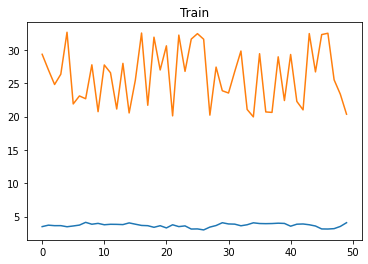

2/2 [==============================] - 1s 4ms/step


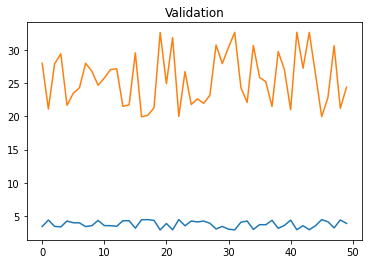

3/3 [==============================] - 0s 5ms/step


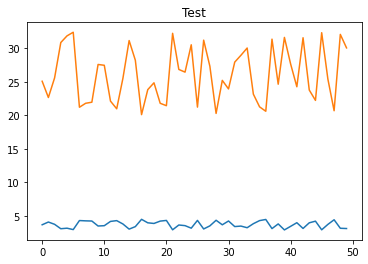

3/3 [==============================] - 0s 4ms/step


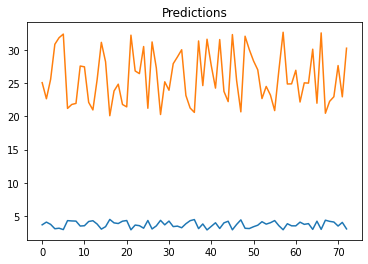

In [12]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 373.9170 - root_mean_squared_error: 19.3369 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 11s 1s/step - loss: 373.8783 - root_mean_squared_error: 19.3359 - val_loss: 334.5769 - val_root_mean_squared_error: 18.2914
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 277.1133 - root_mean_squared_error: 16.6467

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 314ms/step - loss: 277.1133 - root_mean_squared_error: 16.6467 - val_loss: 263.4223 - val_root_mean_squared_error: 16.2303
Epoch 3/30
4/8 [==============>...............] - ETA: 0s - loss: 207.8350 - root_mean_squared_error: 14.4165

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 547ms/step - loss: 197.6169 - root_mean_squared_error: 14.0576 - val_loss: 191.5594 - val_root_mean_squared_error: 13.8405
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 148.4728 - root_mean_squared_error: 12.1849

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 676ms/step - loss: 147.7701 - root_mean_squared_error: 12.1561 - val_loss: 122.9756 - val_root_mean_squared_error: 11.0894
Epoch 5/30
5/8 [=================>............] - ETA: 0s - loss: 125.0388 - root_mean_squared_error: 11.1821

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 117.2012 - root_mean_squared_error: 10.8260 - val_loss: 70.6962 - val_root_mean_squared_error: 8.4081
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 75.2965 - root_mean_squared_error: 8.6774

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 575ms/step - loss: 77.4089 - root_mean_squared_error: 8.7982 - val_loss: 34.9591 - val_root_mean_squared_error: 5.9126
Epoch 7/30
4/8 [==============>...............] - ETA: 0s - loss: 50.4254 - root_mean_squared_error: 7.1011

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 587ms/step - loss: 55.0807 - root_mean_squared_error: 7.4216 - val_loss: 14.0667 - val_root_mean_squared_error: 3.7506
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 44.8269 - root_mean_squared_error: 6.6953

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 621ms/step - loss: 44.8269 - root_mean_squared_error: 6.6953 - val_loss: 5.0578 - val_root_mean_squared_error: 2.2490
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 34.2082 - root_mean_squared_error: 5.8488

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 584ms/step - loss: 33.4553 - root_mean_squared_error: 5.7841 - val_loss: 1.8746 - val_root_mean_squared_error: 1.3692
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 36.6916 - root_mean_squared_error: 6.0574

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 669ms/step - loss: 37.0180 - root_mean_squared_error: 6.0842 - val_loss: 0.8585 - val_root_mean_squared_error: 0.9265
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 50.1957 - root_mean_squared_error: 7.0849

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 554ms/step - loss: 46.0539 - root_mean_squared_error: 6.7863 - val_loss: 0.5263 - val_root_mean_squared_error: 0.7254
Epoch 12/30
8/8 [==============================] - 0s 28ms/step - loss: 35.9010 - root_mean_squared_error: 5.9917 - val_loss: 0.5721 - val_root_mean_squared_error: 0.7564
Epoch 13/30
8/8 [==============================] - 0s 23ms/step - loss: 34.9785 - root_mean_squared_error: 5.9143 - val_loss: 0.7802 - val_root_mean_squared_error: 0.8833
Epoch 14/30
8/8 [==============================] - 0s 29ms/step - loss: 33.9602 - root_mean_squared_error: 5.8275 - val_loss: 0.9876 - val_root_mean_squared_error: 0.9938
Epoch 15/30
8/8 [==============================] - 0s 26ms/step - loss: 31.7301 - root_mean_squared_error: 5.6329 - val_loss: 1.0594 - val_root_mean_squared_error: 1.0293
Epoch 16/30
8/8 [==============================] - 0s 18ms/step - loss: 32.2643 - root_mean_squared_error: 5.6802 - val_loss: 1.7789 - val_root_mean_squared

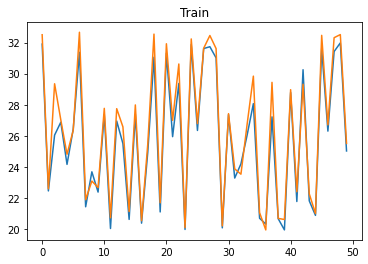

2/2 [==============================] - 0s 4ms/step


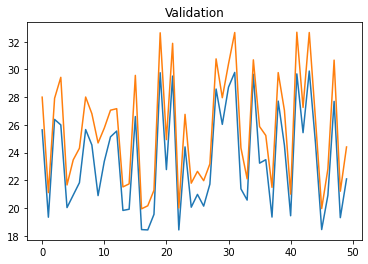

3/3 [==============================] - 0s 4ms/step


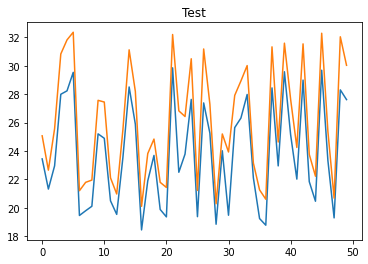

3/3 [==============================] - 0s 4ms/step


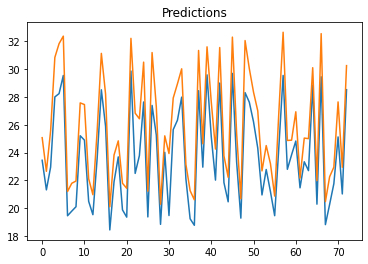

In [13]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [14]:
auto_cnn_mse

5.133449058257621

### GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 722.5438 - root_mean_squared_error: 26.8802  

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 34s 3s/step - loss: 722.5438 - root_mean_squared_error: 26.8802 - val_loss: 743.6662 - val_root_mean_squared_error: 27.2702
Epoch 2/30
4/8 [==============>...............] - ETA: 0s - loss: 723.1554 - root_mean_squared_error: 26.8915

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 717.7542 - root_mean_squared_error: 26.7909 - val_loss: 737.9111 - val_root_mean_squared_error: 27.1645
Epoch 3/30
5/8 [=================>............] - ETA: 0s - loss: 716.6678 - root_mean_squared_error: 26.7707

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 708.9193 - root_mean_squared_error: 26.6255 - val_loss: 732.1628 - val_root_mean_squared_error: 27.0585
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 704.5936 - root_mean_squared_error: 26.5442

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 702.1436 - root_mean_squared_error: 26.4980 - val_loss: 726.4062 - val_root_mean_squared_error: 26.9519
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 694.9846 - root_mean_squared_error: 26.3626

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 695.7934 - root_mean_squared_error: 26.3779 - val_loss: 720.6387 - val_root_mean_squared_error: 26.8447
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 677.9778 - root_mean_squared_error: 26.0380

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 689.7794 - root_mean_squared_error: 26.2637 - val_loss: 714.8765 - val_root_mean_squared_error: 26.7372
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 684.4328 - root_mean_squared_error: 26.1617

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 684.8250 - root_mean_squared_error: 26.1692 - val_loss: 709.0403 - val_root_mean_squared_error: 26.6278
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 682.3264 - root_mean_squared_error: 26.1214

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 679.9271 - root_mean_squared_error: 26.0754 - val_loss: 703.1985 - val_root_mean_squared_error: 26.5179
Epoch 9/30
5/8 [=================>............] - ETA: 0s - loss: 669.4066 - root_mean_squared_error: 25.8729

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 674.0130 - root_mean_squared_error: 25.9618 - val_loss: 697.3531 - val_root_mean_squared_error: 26.4074
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 667.7607 - root_mean_squared_error: 25.8411

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 667.7607 - root_mean_squared_error: 25.8411 - val_loss: 691.4896 - val_root_mean_squared_error: 26.2962
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 662.2480 - root_mean_squared_error: 25.7342

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 662.2480 - root_mean_squared_error: 25.7342 - val_loss: 685.5494 - val_root_mean_squared_error: 26.1830
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 658.5696 - root_mean_squared_error: 25.6626

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 656.4982 - root_mean_squared_error: 25.6222 - val_loss: 679.5078 - val_root_mean_squared_error: 26.0674
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 651.9767 - root_mean_squared_error: 25.5338

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 652.4465 - root_mean_squared_error: 25.5430 - val_loss: 673.4207 - val_root_mean_squared_error: 25.9503
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 641.0596 - root_mean_squared_error: 25.3192

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 643.7384 - root_mean_squared_error: 25.3720 - val_loss: 667.2489 - val_root_mean_squared_error: 25.8312
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 640.9990 - root_mean_squared_error: 25.3180

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 640.5335 - root_mean_squared_error: 25.3088 - val_loss: 660.9282 - val_root_mean_squared_error: 25.7085
Epoch 16/30
5/8 [=================>............] - ETA: 1s - loss: 644.6280 - root_mean_squared_error: 25.3895

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 632.9527 - root_mean_squared_error: 25.1586 - val_loss: 654.5160 - val_root_mean_squared_error: 25.5835
Epoch 17/30
3/8 [==========>...................] - ETA: 0s - loss: 623.0294 - root_mean_squared_error: 24.9606

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 626.8806 - root_mean_squared_error: 25.0376 - val_loss: 647.9741 - val_root_mean_squared_error: 25.4553
Epoch 18/30
5/8 [=================>............] - ETA: 0s - loss: 607.4316 - root_mean_squared_error: 24.6461

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 619.5065 - root_mean_squared_error: 24.8899 - val_loss: 641.2700 - val_root_mean_squared_error: 25.3233
Epoch 19/30
5/8 [=================>............] - ETA: 0s - loss: 600.6835 - root_mean_squared_error: 24.5088

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 612.5784 - root_mean_squared_error: 24.7503 - val_loss: 634.4076 - val_root_mean_squared_error: 25.1874
Epoch 20/30
3/8 [==========>...................] - ETA: 0s - loss: 604.8266 - root_mean_squared_error: 24.5932

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 605.7804 - root_mean_squared_error: 24.6126 - val_loss: 627.3464 - val_root_mean_squared_error: 25.0469
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 598.4856 - root_mean_squared_error: 24.4640

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 600.6169 - root_mean_squared_error: 24.5075 - val_loss: 620.1166 - val_root_mean_squared_error: 24.9021
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 593.2864 - root_mean_squared_error: 24.3575

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 592.6495 - root_mean_squared_error: 24.3444 - val_loss: 612.6686 - val_root_mean_squared_error: 24.7521
Epoch 23/30
5/8 [=================>............] - ETA: 0s - loss: 589.2365 - root_mean_squared_error: 24.2742

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 582.0253 - root_mean_squared_error: 24.1252 - val_loss: 604.9738 - val_root_mean_squared_error: 24.5962
Epoch 24/30
6/8 [=====================>........] - ETA: 0s - loss: 578.8671 - root_mean_squared_error: 24.0597

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 576.6390 - root_mean_squared_error: 24.0133 - val_loss: 597.0623 - val_root_mean_squared_error: 24.4349
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 568.5357 - root_mean_squared_error: 23.8440

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 568.5357 - root_mean_squared_error: 23.8440 - val_loss: 588.9100 - val_root_mean_squared_error: 24.2675
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 559.5944 - root_mean_squared_error: 23.6557

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 558.0773 - root_mean_squared_error: 23.6237 - val_loss: 580.5804 - val_root_mean_squared_error: 24.0952
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 547.8401 - root_mean_squared_error: 23.4060

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 549.7474 - root_mean_squared_error: 23.4467 - val_loss: 572.0627 - val_root_mean_squared_error: 23.9178
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 540.0109 - root_mean_squared_error: 23.2381

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 540.2516 - root_mean_squared_error: 23.2433 - val_loss: 563.3409 - val_root_mean_squared_error: 23.7348
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 533.6906 - root_mean_squared_error: 23.1017

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 533.6906 - root_mean_squared_error: 23.1017 - val_loss: 554.4822 - val_root_mean_squared_error: 23.5474
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 526.7479 - root_mean_squared_error: 22.9510

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 8s 11ms/step


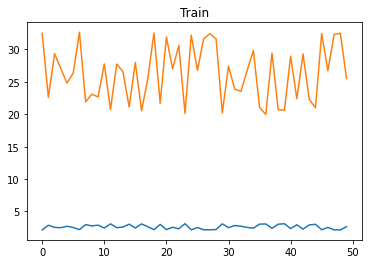

2/2 [==============================] - 2s 11ms/step


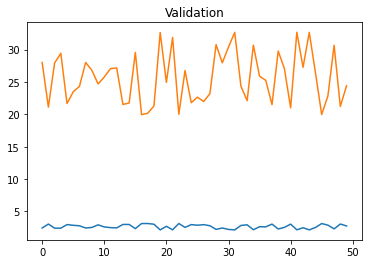

3/3 [==============================] - 0s 51ms/step


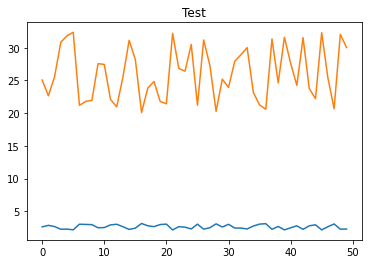

3/3 [==============================] - 0s 5ms/step


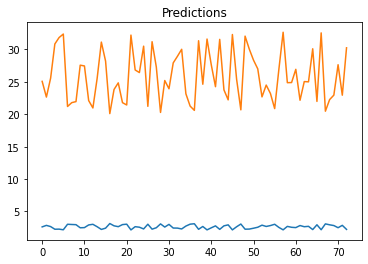

In [15]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [16]:
auto_gru_mse

556.9687481017938

### LSTM

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 688.9086 - root_mean_squared_error: 26.2471 

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 4s/step - loss: 689.2346 - root_mean_squared_error: 26.2533 - val_loss: 708.0063 - val_root_mean_squared_error: 26.6084
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 686.9759 - root_mean_squared_error: 26.2102

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 685.3570 - root_mean_squared_error: 26.1793 - val_loss: 703.5878 - val_root_mean_squared_error: 26.5252
Epoch 3/30
5/8 [=================>............] - ETA: 0s - loss: 678.8571 - root_mean_squared_error: 26.0549

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 681.7794 - root_mean_squared_error: 26.1109 - val_loss: 699.2905 - val_root_mean_squared_error: 26.4441
Epoch 4/30
5/8 [=================>............] - ETA: 0s - loss: 693.4879 - root_mean_squared_error: 26.3342

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 677.1440 - root_mean_squared_error: 26.0220 - val_loss: 695.1652 - val_root_mean_squared_error: 26.3660
Epoch 5/30
5/8 [=================>............] - ETA: 0s - loss: 676.7101 - root_mean_squared_error: 26.0137

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 674.7057 - root_mean_squared_error: 25.9751 - val_loss: 691.1786 - val_root_mean_squared_error: 26.2903
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 672.4742 - root_mean_squared_error: 25.9321

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 671.6636 - root_mean_squared_error: 25.9165 - val_loss: 687.2687 - val_root_mean_squared_error: 26.2158
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 667.8970 - root_mean_squared_error: 25.8437

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 667.8970 - root_mean_squared_error: 25.8437 - val_loss: 683.4628 - val_root_mean_squared_error: 26.1431
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 663.2109 - root_mean_squared_error: 25.7529

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 667.0206 - root_mean_squared_error: 25.8267 - val_loss: 679.7343 - val_root_mean_squared_error: 26.0717
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 662.1530 - root_mean_squared_error: 25.7323

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 662.1530 - root_mean_squared_error: 25.7323 - val_loss: 676.2131 - val_root_mean_squared_error: 26.0041
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 660.5898 - root_mean_squared_error: 25.7019

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 660.2988 - root_mean_squared_error: 25.6963 - val_loss: 672.9732 - val_root_mean_squared_error: 25.9417
Epoch 11/30
5/8 [=================>............] - ETA: 0s - loss: 664.3060 - root_mean_squared_error: 25.7741

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 658.1652 - root_mean_squared_error: 25.6547 - val_loss: 670.0772 - val_root_mean_squared_error: 25.8858
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 655.1723 - root_mean_squared_error: 25.5963

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 656.3969 - root_mean_squared_error: 25.6202 - val_loss: 668.4506 - val_root_mean_squared_error: 25.8544
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 655.0811 - root_mean_squared_error: 25.5946

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 655.0811 - root_mean_squared_error: 25.5946 - val_loss: 667.6649 - val_root_mean_squared_error: 25.8392
Epoch 14/30
4/8 [==============>...............] - ETA: 0s - loss: 662.7796 - root_mean_squared_error: 25.7445

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 652.9502 - root_mean_squared_error: 25.5529 - val_loss: 667.1681 - val_root_mean_squared_error: 25.8296
Epoch 15/30
5/8 [=================>............] - ETA: 0s - loss: 651.9736 - root_mean_squared_error: 25.5338

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 652.7170 - root_mean_squared_error: 25.5483 - val_loss: 666.8016 - val_root_mean_squared_error: 25.8225
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 651.8009 - root_mean_squared_error: 25.5304

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 650.7712 - root_mean_squared_error: 25.5102 - val_loss: 666.5314 - val_root_mean_squared_error: 25.8173
Epoch 17/30
4/8 [==============>...............] - ETA: 0s - loss: 647.6072 - root_mean_squared_error: 25.4481

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 650.2473 - root_mean_squared_error: 25.4999 - val_loss: 666.2729 - val_root_mean_squared_error: 25.8123
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 662.9971 - root_mean_squared_error: 25.7487

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 648.3046 - root_mean_squared_error: 25.4618 - val_loss: 666.0071 - val_root_mean_squared_error: 25.8071
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 642.2603 - root_mean_squared_error: 25.3429

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 648.1620 - root_mean_squared_error: 25.4590 - val_loss: 665.7458 - val_root_mean_squared_error: 25.8021
Epoch 20/30
5/8 [=================>............] - ETA: 0s - loss: 645.2951 - root_mean_squared_error: 25.4027

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 646.6151 - root_mean_squared_error: 25.4286 - val_loss: 665.4741 - val_root_mean_squared_error: 25.7968
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 649.2233 - root_mean_squared_error: 25.4799

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 645.5642 - root_mean_squared_error: 25.4080 - val_loss: 665.1854 - val_root_mean_squared_error: 25.7912
Epoch 22/30
5/8 [=================>............] - ETA: 0s - loss: 637.0660 - root_mean_squared_error: 25.2402

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 643.5786 - root_mean_squared_error: 25.3689 - val_loss: 664.8818 - val_root_mean_squared_error: 25.7853
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 646.0317 - root_mean_squared_error: 25.4172

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 643.8695 - root_mean_squared_error: 25.3746 - val_loss: 664.5558 - val_root_mean_squared_error: 25.7790
Epoch 24/30
6/8 [=====================>........] - ETA: 0s - loss: 635.9570 - root_mean_squared_error: 25.2182

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 643.1765 - root_mean_squared_error: 25.3609 - val_loss: 664.2170 - val_root_mean_squared_error: 25.7724
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 636.4833 - root_mean_squared_error: 25.2286

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 642.6835 - root_mean_squared_error: 25.3512 - val_loss: 663.8713 - val_root_mean_squared_error: 25.7657
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 661.0547 - root_mean_squared_error: 25.7110

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 641.2175 - root_mean_squared_error: 25.3223 - val_loss: 663.5098 - val_root_mean_squared_error: 25.7587
Epoch 27/30
4/8 [==============>...............] - ETA: 0s - loss: 646.9929 - root_mean_squared_error: 25.4361

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 641.2558 - root_mean_squared_error: 25.3230 - val_loss: 663.1300 - val_root_mean_squared_error: 25.7513
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 638.2104 - root_mean_squared_error: 25.2628

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 640.2339 - root_mean_squared_error: 25.3028 - val_loss: 662.7350 - val_root_mean_squared_error: 25.7436
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 633.6885 - root_mean_squared_error: 25.1732

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 639.8450 - root_mean_squared_error: 25.2952 - val_loss: 662.3188 - val_root_mean_squared_error: 25.7356
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 642.5999 - root_mean_squared_error: 25.3496

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 2s 11ms/step


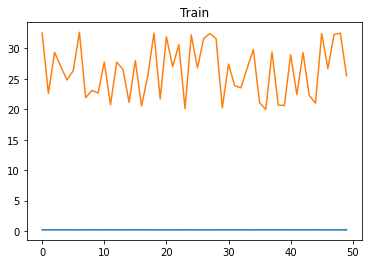

2/2 [==============================] - 2s 9ms/step


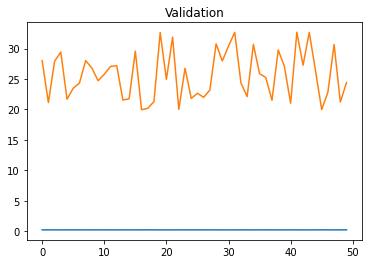

3/3 [==============================] - 0s 7ms/step


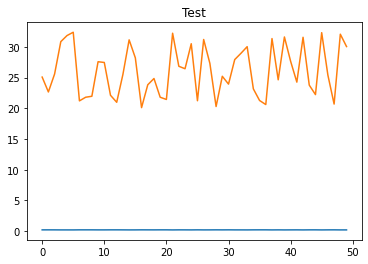

3/3 [==============================] - 0s 12ms/step


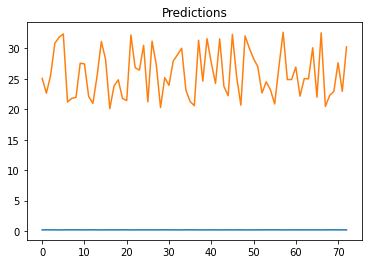

In [17]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [18]:
auto_lstm_mse

673.8899240705049

### RNN

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 640.6113 - root_mean_squared_error: 25.3103INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 20s 1s/step - loss: 640.6113 - root_mean_squared_error: 25.3103 - val_loss: 660.1925 - val_root_mean_squared_error: 25.6942
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 620.2180 - root_mean_squared_error: 24.9042INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 626.5107 - root_mean_squared_error: 25.0302 - val_loss: 651.7122 - val_root_mean_squared_error: 25.5287
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 617.9890 - root_mean_squared_error: 24.8594INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 871ms/step - loss: 617.9890 - root_mean_squared_error: 24.8594 - val_loss: 643.3256 - val_root_mean_squared_error: 25.3639
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 608.1786 - root_mean_squared_error: 24.6613INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 776ms/step - loss: 608.1786 - root_mean_squared_error: 24.6613 - val_loss: 635.0520 - val_root_mean_squared_error: 25.2002
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 608.4741 - root_mean_squared_error: 24.6673INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 609.2489 - root_mean_squared_error: 24.6830 - val_loss: 626.8582 - val_root_mean_squared_error: 25.0371
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 595.9774 - root_mean_squared_error: 24.4126INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 976ms/step - loss: 595.7086 - root_mean_squared_error: 24.4071 - val_loss: 618.6984 - val_root_mean_squared_error: 24.8736
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 590.0928 - root_mean_squared_error: 24.2918INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 704ms/step - loss: 591.6356 - root_mean_squared_error: 24.3236 - val_loss: 610.5056 - val_root_mean_squared_error: 24.7084
Epoch 8/30
4/8 [==============>...............] - ETA: 0s - loss: 599.4323 - root_mean_squared_error: 24.4833INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 587.6765 - root_mean_squared_error: 24.2420 - val_loss: 602.3835 - val_root_mean_squared_error: 24.5435
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 571.9846 - root_mean_squared_error: 23.9162INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 571.9846 - root_mean_squared_error: 23.9162 - val_loss: 594.2999 - val_root_mean_squared_error: 24.3783
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 555.2417 - root_mean_squared_error: 23.5636INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 565.4825 - root_mean_squared_error: 23.7799 - val_loss: 586.3239 - val_root_mean_squared_error: 24.2141
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 579.9635 - root_mean_squared_error: 24.0824INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 907ms/step - loss: 564.0629 - root_mean_squared_error: 23.7500 - val_loss: 578.3399 - val_root_mean_squared_error: 24.0487
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 547.3015 - root_mean_squared_error: 23.3945INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 547.3015 - root_mean_squared_error: 23.3945 - val_loss: 570.4471 - val_root_mean_squared_error: 23.8840
Epoch 13/30
4/8 [==============>...............] - ETA: 0s - loss: 547.4098 - root_mean_squared_error: 23.3968INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 547.8098 - root_mean_squared_error: 23.4053 - val_loss: 562.6038 - val_root_mean_squared_error: 23.7193
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 539.4667 - root_mean_squared_error: 23.2264INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 968ms/step - loss: 539.4667 - root_mean_squared_error: 23.2264 - val_loss: 554.9474 - val_root_mean_squared_error: 23.5573
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 532.6876 - root_mean_squared_error: 23.0800INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 529.9672 - root_mean_squared_error: 23.0210 - val_loss: 547.3810 - val_root_mean_squared_error: 23.3962
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 532.9915 - root_mean_squared_error: 23.0866INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 925ms/step - loss: 522.3411 - root_mean_squared_error: 22.8548 - val_loss: 539.9766 - val_root_mean_squared_error: 23.2374
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 494.8373 - root_mean_squared_error: 22.2449INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 516.4749 - root_mean_squared_error: 22.7261 - val_loss: 532.5636 - val_root_mean_squared_error: 23.0773
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 502.2920 - root_mean_squared_error: 22.4119INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 769ms/step - loss: 498.2204 - root_mean_squared_error: 22.3209 - val_loss: 525.1645 - val_root_mean_squared_error: 22.9165
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 507.6025 - root_mean_squared_error: 22.5300INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 850ms/step - loss: 503.6926 - root_mean_squared_error: 22.4431 - val_loss: 517.7803 - val_root_mean_squared_error: 22.7548
Epoch 20/30
6/8 [=====================>........] - ETA: 0s - loss: 493.1027 - root_mean_squared_error: 22.2059INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 836ms/step - loss: 489.2718 - root_mean_squared_error: 22.1195 - val_loss: 510.4733 - val_root_mean_squared_error: 22.5937
Epoch 21/30
5/8 [=================>............] - ETA: 0s - loss: 471.5404 - root_mean_squared_error: 21.7150INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 479.1803 - root_mean_squared_error: 21.8902 - val_loss: 503.1147 - val_root_mean_squared_error: 22.4302
Epoch 22/30
5/8 [=================>............] - ETA: 0s - loss: 474.6347 - root_mean_squared_error: 21.7861INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 947ms/step - loss: 475.9949 - root_mean_squared_error: 21.8173 - val_loss: 495.6562 - val_root_mean_squared_error: 22.2633
Epoch 23/30
6/8 [=====================>........] - ETA: 0s - loss: 470.1858 - root_mean_squared_error: 21.6838INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 776ms/step - loss: 469.8424 - root_mean_squared_error: 21.6758 - val_loss: 487.9654 - val_root_mean_squared_error: 22.0899
Epoch 24/30
5/8 [=================>............] - ETA: 0s - loss: 448.8230 - root_mean_squared_error: 21.1854INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 865ms/step - loss: 460.5393 - root_mean_squared_error: 21.4602 - val_loss: 480.3550 - val_root_mean_squared_error: 21.9170
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 502.4184 - root_mean_squared_error: 22.4147INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 460.0072 - root_mean_squared_error: 21.4478 - val_loss: 472.7844 - val_root_mean_squared_error: 21.7436
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 467.1734 - root_mean_squared_error: 21.6142INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 446.9191 - root_mean_squared_error: 21.1405 - val_loss: 465.1994 - val_root_mean_squared_error: 21.5685
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 457.9153 - root_mean_squared_error: 21.3990INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 976ms/step - loss: 435.1401 - root_mean_squared_error: 20.8600 - val_loss: 457.5914 - val_root_mean_squared_error: 21.3914
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 377.0024 - root_mean_squared_error: 19.4166INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 434.1923 - root_mean_squared_error: 20.8373 - val_loss: 449.9104 - val_root_mean_squared_error: 21.2111
Epoch 29/30
5/8 [=================>............] - ETA: 0s - loss: 417.2682 - root_mean_squared_error: 20.4271INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 425.5788 - root_mean_squared_error: 20.6296 - val_loss: 441.8396 - val_root_mean_squared_error: 21.0200
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 413.8652 - root_mean_squared_error: 20.3437INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 3ms/step


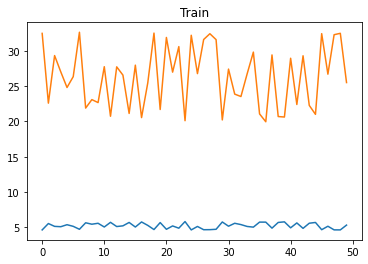

2/2 [==============================] - 1s 179ms/step


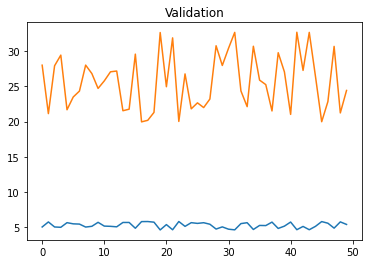

3/3 [==============================] - 0s 22ms/step


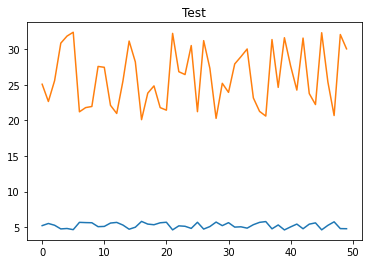

3/3 [==============================] - 0s 6ms/step


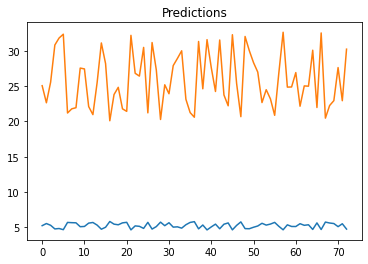

In [19]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [20]:
auto_rnn_mse

443.5097083200188

# Moving Average with Encoder

### CNN

Epoch 1/10
6/8 [=====================>........] - ETA: 0s - loss: 790.9267 - root_mean_squared_error: 28.1234

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 9s 849ms/step - loss: 789.2268 - root_mean_squared_error: 28.0932 - val_loss: 739.2446 - val_root_mean_squared_error: 27.1891
Epoch 2/10
7/8 [=========================>....] - ETA: 0s - loss: 664.4903 - root_mean_squared_error: 25.7777

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 944ms/step - loss: 661.5832 - root_mean_squared_error: 25.7213 - val_loss: 616.1960 - val_root_mean_squared_error: 24.8233
Epoch 3/10
6/8 [=====================>........] - ETA: 0s - loss: 603.2615 - root_mean_squared_error: 24.5614

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 465ms/step - loss: 600.6080 - root_mean_squared_error: 24.5073 - val_loss: 505.9011 - val_root_mean_squared_error: 22.4922
Epoch 4/10
6/8 [=====================>........] - ETA: 0s - loss: 491.8224 - root_mean_squared_error: 22.1771

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 421ms/step - loss: 497.2019 - root_mean_squared_error: 22.2980 - val_loss: 405.6438 - val_root_mean_squared_error: 20.1406
Epoch 5/10
6/8 [=====================>........] - ETA: 0s - loss: 448.2874 - root_mean_squared_error: 21.1728

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 657ms/step - loss: 442.7928 - root_mean_squared_error: 21.0426 - val_loss: 316.2248 - val_root_mean_squared_error: 17.7827
Epoch 6/10
7/8 [=========================>....] - ETA: 0s - loss: 338.8548 - root_mean_squared_error: 18.4080

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 583ms/step - loss: 336.4758 - root_mean_squared_error: 18.3433 - val_loss: 241.2918 - val_root_mean_squared_error: 15.5336
Epoch 7/10
1/8 [==>...........................] - ETA: 0s - loss: 334.9485 - root_mean_squared_error: 18.3016

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 896ms/step - loss: 282.6228 - root_mean_squared_error: 16.8114 - val_loss: 188.1074 - val_root_mean_squared_error: 13.7152
Epoch 8/10
8/8 [==============================] - ETA: 0s - loss: 244.1869 - root_mean_squared_error: 15.6265

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 821ms/step - loss: 244.1869 - root_mean_squared_error: 15.6265 - val_loss: 142.8692 - val_root_mean_squared_error: 11.9528
Epoch 9/10
5/8 [=================>............] - ETA: 0s - loss: 210.8710 - root_mean_squared_error: 14.5214

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 518ms/step - loss: 196.7310 - root_mean_squared_error: 14.0261 - val_loss: 104.8955 - val_root_mean_squared_error: 10.2418
Epoch 10/10
4/8 [==============>...............] - ETA: 0s - loss: 146.1211 - root_mean_squared_error: 12.0881

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 0s 12ms/step


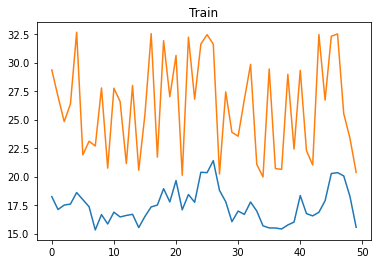

2/2 [==============================] - 0s 13ms/step


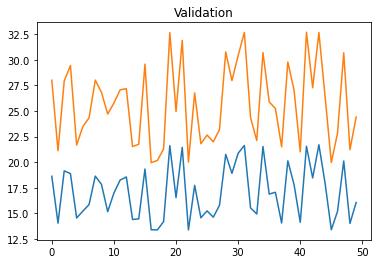

3/3 [==============================] - 0s 4ms/step


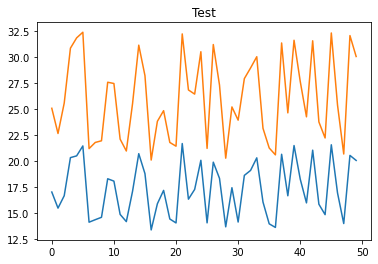

3/3 [==============================] - 0s 27ms/step


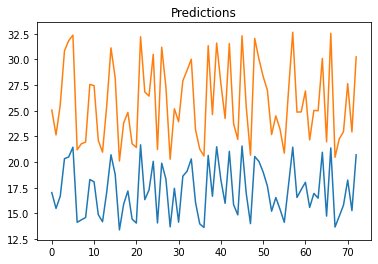

In [21]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [22]:
mavg_auto_cnn_mse

76.71847209330654

### RNN

Epoch 1/10
1/8 [==>...........................] - ETA: 35s - loss: 658.3289 - root_mean_squared_error: 25.6579INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 610.2673 - root_mean_squared_error: 24.7036 - val_loss: 637.7078 - val_root_mean_squared_error: 25.2529
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 606.9998 - root_mean_squared_error: 24.6374INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 862ms/step - loss: 606.9998 - root_mean_squared_error: 24.6374 - val_loss: 631.6898 - val_root_mean_squared_error: 25.1334
Epoch 3/10
6/8 [=====================>........] - ETA: 0s - loss: 603.1975 - root_mean_squared_error: 24.5601INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 970ms/step - loss: 601.7358 - root_mean_squared_error: 24.5303 - val_loss: 625.6831 - val_root_mean_squared_error: 25.0137
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 601.9019 - root_mean_squared_error: 24.5337INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 601.9019 - root_mean_squared_error: 24.5337 - val_loss: 619.7690 - val_root_mean_squared_error: 24.8952
Epoch 5/10
7/8 [=========================>....] - ETA: 0s - loss: 592.0629 - root_mean_squared_error: 24.3323INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 956ms/step - loss: 592.0938 - root_mean_squared_error: 24.3330 - val_loss: 613.7933 - val_root_mean_squared_error: 24.7749
Epoch 6/10
8/8 [==============================] - ETA: 0s - loss: 586.4798 - root_mean_squared_error: 24.2173INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 586.4798 - root_mean_squared_error: 24.2173 - val_loss: 607.8104 - val_root_mean_squared_error: 24.6538
Epoch 7/10
7/8 [=========================>....] - ETA: 0s - loss: 581.7593 - root_mean_squared_error: 24.1197INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 580.8911 - root_mean_squared_error: 24.1017 - val_loss: 601.8083 - val_root_mean_squared_error: 24.5318
Epoch 8/10
1/8 [==>...........................] - ETA: 0s - loss: 546.8957 - root_mean_squared_error: 23.3858INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 570.7374 - root_mean_squared_error: 23.8901 - val_loss: 595.8607 - val_root_mean_squared_error: 24.4103
Epoch 9/10
1/8 [==>...........................] - ETA: 0s - loss: 574.5013 - root_mean_squared_error: 23.9688INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 946ms/step - loss: 563.2055 - root_mean_squared_error: 23.7320 - val_loss: 589.8680 - val_root_mean_squared_error: 24.2872
Epoch 10/10
4/8 [==============>...............] - ETA: 0s - loss: 554.7042 - root_mean_squared_error: 23.5522INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 4ms/step


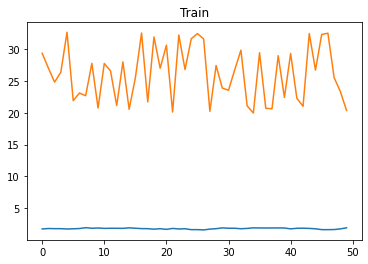

2/2 [==============================] - 1s 47ms/step


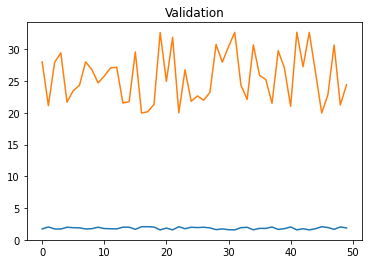

3/3 [==============================] - 0s 5ms/step


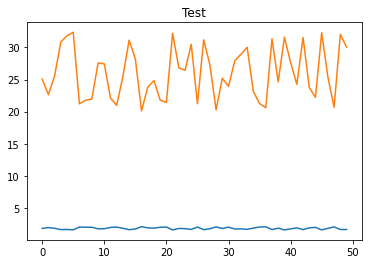

3/3 [==============================] - 0s 4ms/step


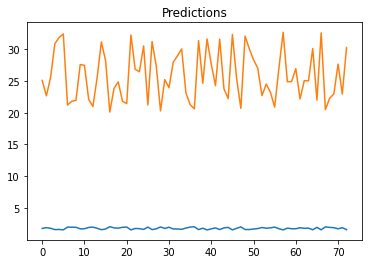

In [23]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [24]:
mavg_auto_rnn_mse

595.2566293404188

### GRU

Epoch 1/10
5/8 [=================>............] - ETA: 0s - loss: 649.5417 - root_mean_squared_error: 25.4861  

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 43s 3s/step - loss: 644.8792 - root_mean_squared_error: 25.3945 - val_loss: 671.8051 - val_root_mean_squared_error: 25.9192
Epoch 2/10
7/8 [=========================>....] - ETA: 0s - loss: 642.8632 - root_mean_squared_error: 25.3547

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 641.4932 - root_mean_squared_error: 25.3277 - val_loss: 666.2257 - val_root_mean_squared_error: 25.8113
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 639.1752 - root_mean_squared_error: 25.2819

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 639.1752 - root_mean_squared_error: 25.2819 - val_loss: 660.6690 - val_root_mean_squared_error: 25.7035
Epoch 4/10
5/8 [=================>............] - ETA: 0s - loss: 645.3915 - root_mean_squared_error: 25.4046

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 631.3682 - root_mean_squared_error: 25.1270 - val_loss: 655.0962 - val_root_mean_squared_error: 25.5948
Epoch 5/10
8/8 [==============================] - ETA: 0s - loss: 622.7177 - root_mean_squared_error: 24.9543

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 622.7177 - root_mean_squared_error: 24.9543 - val_loss: 649.5461 - val_root_mean_squared_error: 25.4862
Epoch 6/10
7/8 [=========================>....] - ETA: 0s - loss: 618.4746 - root_mean_squared_error: 24.8692

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 622.4366 - root_mean_squared_error: 24.9487 - val_loss: 643.9451 - val_root_mean_squared_error: 25.3761
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 613.6663 - root_mean_squared_error: 24.7723

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 613.6663 - root_mean_squared_error: 24.7723 - val_loss: 638.3333 - val_root_mean_squared_error: 25.2653
Epoch 8/10
6/8 [=====================>........] - ETA: 0s - loss: 600.8170 - root_mean_squared_error: 24.5116

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 608.2105 - root_mean_squared_error: 24.6619 - val_loss: 632.7235 - val_root_mean_squared_error: 25.1540
Epoch 9/10
4/8 [==============>...............] - ETA: 0s - loss: 623.2946 - root_mean_squared_error: 24.9659

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 602.6535 - root_mean_squared_error: 24.5490 - val_loss: 627.0269 - val_root_mean_squared_error: 25.0405
Epoch 10/10
4/8 [==============>...............] - ETA: 0s - loss: 595.7245 - root_mean_squared_error: 24.4075

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 3s 10ms/step


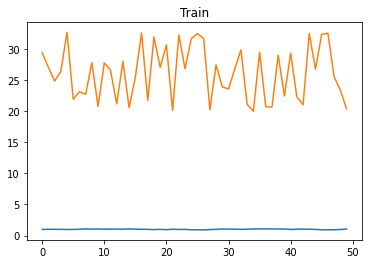

2/2 [==============================] - 5s 18ms/step


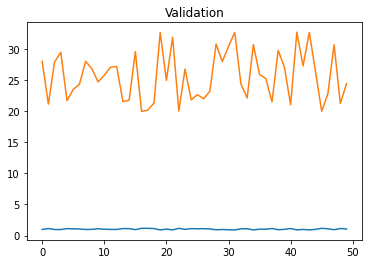

3/3 [==============================] - 0s 19ms/step


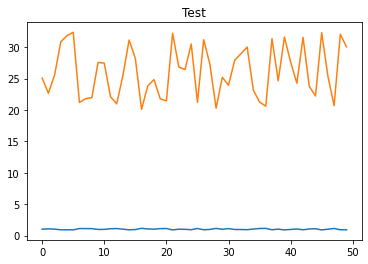

3/3 [==============================] - 0s 111ms/step


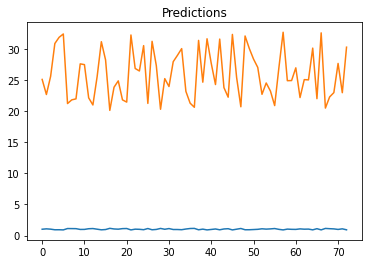

In [25]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [26]:
mavg_auto_gru_mse

633.1168306902282

### LSTM

Epoch 1/10
7/8 [=========================>....] - ETA: 0s - loss: 643.8549 - root_mean_squared_error: 25.3743 

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 42s 5s/step - loss: 642.9230 - root_mean_squared_error: 25.3559 - val_loss: 667.3585 - val_root_mean_squared_error: 25.8333
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 636.2794 - root_mean_squared_error: 25.2246

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 636.2794 - root_mean_squared_error: 25.2246 - val_loss: 663.5741 - val_root_mean_squared_error: 25.7599
Epoch 3/10
4/8 [==============>...............] - ETA: 0s - loss: 625.9216 - root_mean_squared_error: 25.0184

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 634.5941 - root_mean_squared_error: 25.1912 - val_loss: 659.7818 - val_root_mean_squared_error: 25.6862
Epoch 4/10
5/8 [=================>............] - ETA: 0s - loss: 635.7399 - root_mean_squared_error: 25.2139

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 629.0147 - root_mean_squared_error: 25.0802 - val_loss: 655.9745 - val_root_mean_squared_error: 25.6120
Epoch 5/10
6/8 [=====================>........] - ETA: 0s - loss: 623.4153 - root_mean_squared_error: 24.9683

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 626.5608 - root_mean_squared_error: 25.0312 - val_loss: 652.1927 - val_root_mean_squared_error: 25.5381
Epoch 6/10
3/8 [==========>...................] - ETA: 0s - loss: 630.1740 - root_mean_squared_error: 25.1033

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 623.9561 - root_mean_squared_error: 24.9791 - val_loss: 648.4381 - val_root_mean_squared_error: 25.4644
Epoch 7/10
6/8 [=====================>........] - ETA: 0s - loss: 630.7531 - root_mean_squared_error: 25.1148

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 619.5777 - root_mean_squared_error: 24.8913 - val_loss: 644.7046 - val_root_mean_squared_error: 25.3910
Epoch 8/10
5/8 [=================>............] - ETA: 0s - loss: 614.9884 - root_mean_squared_error: 24.7990

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 615.1693 - root_mean_squared_error: 24.8026 - val_loss: 640.9937 - val_root_mean_squared_error: 25.3179
Epoch 9/10
6/8 [=====================>........] - ETA: 0s - loss: 603.2673 - root_mean_squared_error: 24.5615

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 612.5067 - root_mean_squared_error: 24.7489 - val_loss: 637.2656 - val_root_mean_squared_error: 25.2441
Epoch 10/10
6/8 [=====================>........] - ETA: 0s - loss: 608.5340 - root_mean_squared_error: 24.6685

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 2s 6ms/step


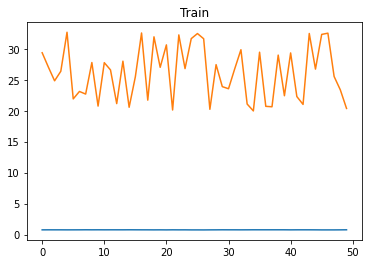

2/2 [==============================] - 1s 23ms/step


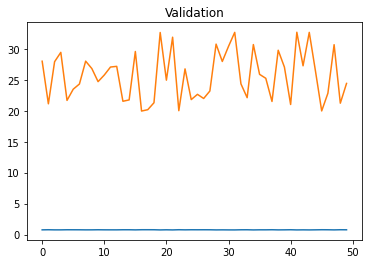

3/3 [==============================] - 0s 3ms/step


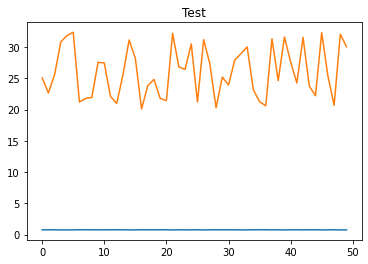

3/3 [==============================] - 0s 17ms/step


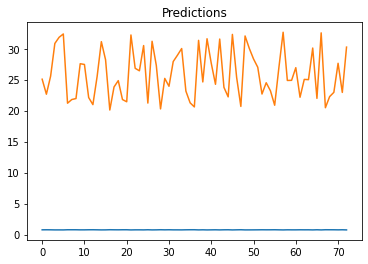

In [27]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [28]:
mavg_auto_lstm_mse

645.2911325888834

# Hybrid

## General

### CNN LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 619.1694 - root_mean_squared_error: 24.8831

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 100s 11s/step - loss: 619.1694 - root_mean_squared_error: 24.8831 - val_loss: 636.2505 - val_root_mean_squared_error: 25.2240
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 611.0258 - root_mean_squared_error: 24.7189

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 74s 11s/step - loss: 605.5255 - root_mean_squared_error: 24.6074 - val_loss: 622.7257 - val_root_mean_squared_error: 24.9545
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 592.1650 - root_mean_squared_error: 24.3344

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 93s 13s/step - loss: 592.1650 - root_mean_squared_error: 24.3344 - val_loss: 608.7992 - val_root_mean_squared_error: 24.6739
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 578.0874 - root_mean_squared_error: 24.0434

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 83s 12s/step - loss: 578.0874 - root_mean_squared_error: 24.0434 - val_loss: 593.6871 - val_root_mean_squared_error: 24.3657
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 562.8226 - root_mean_squared_error: 23.7239

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 82s 12s/step - loss: 562.8226 - root_mean_squared_error: 23.7239 - val_loss: 577.1964 - val_root_mean_squared_error: 24.0249
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 546.6345 - root_mean_squared_error: 23.3802

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 72s 10s/step - loss: 546.6345 - root_mean_squared_error: 23.3802 - val_loss: 560.7316 - val_root_mean_squared_error: 23.6798
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 530.8426 - root_mean_squared_error: 23.0400

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 69s 10s/step - loss: 530.8426 - root_mean_squared_error: 23.0400 - val_loss: 545.0406 - val_root_mean_squared_error: 23.3461
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 515.8559 - root_mean_squared_error: 22.7125

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 86s 12s/step - loss: 515.8559 - root_mean_squared_error: 22.7125 - val_loss: 530.2372 - val_root_mean_squared_error: 23.0269
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 501.7394 - root_mean_squared_error: 22.3995

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 72s 10s/step - loss: 501.7394 - root_mean_squared_error: 22.3995 - val_loss: 516.1610 - val_root_mean_squared_error: 22.7192
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 489.8766 - root_mean_squared_error: 22.1332

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 75s 11s/step - loss: 488.1741 - root_mean_squared_error: 22.0947 - val_loss: 502.5359 - val_root_mean_squared_error: 22.4173
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 476.5112 - root_mean_squared_error: 21.8291

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 87s 12s/step - loss: 475.0359 - root_mean_squared_error: 21.7953 - val_loss: 489.4268 - val_root_mean_squared_error: 22.1230
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 462.4276 - root_mean_squared_error: 21.5041

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 72s 10s/step - loss: 462.4276 - root_mean_squared_error: 21.5041 - val_loss: 476.7798 - val_root_mean_squared_error: 21.8353
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 450.2335 - root_mean_squared_error: 21.2187

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 77s 11s/step - loss: 450.2335 - root_mean_squared_error: 21.2187 - val_loss: 464.4019 - val_root_mean_squared_error: 21.5500
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 438.7004 - root_mean_squared_error: 20.9452

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 81s 12s/step - loss: 438.2074 - root_mean_squared_error: 20.9334 - val_loss: 452.2924 - val_root_mean_squared_error: 21.2672
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 426.8974 - root_mean_squared_error: 20.6615

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 62s 9s/step - loss: 426.8974 - root_mean_squared_error: 20.6615 - val_loss: 441.3012 - val_root_mean_squared_error: 21.0072
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 415.4500 - root_mean_squared_error: 20.3826

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 86s 12s/step - loss: 416.4174 - root_mean_squared_error: 20.4063 - val_loss: 431.1187 - val_root_mean_squared_error: 20.7634
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 406.7653 - root_mean_squared_error: 20.1684

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 73s 10s/step - loss: 406.7653 - root_mean_squared_error: 20.1684 - val_loss: 421.6298 - val_root_mean_squared_error: 20.5336
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 397.8321 - root_mean_squared_error: 19.9457

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 69s 10s/step - loss: 397.8321 - root_mean_squared_error: 19.9457 - val_loss: 413.0564 - val_root_mean_squared_error: 20.3238
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 389.8336 - root_mean_squared_error: 19.7442

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 90s 13s/step - loss: 389.8336 - root_mean_squared_error: 19.7442 - val_loss: 405.3214 - val_root_mean_squared_error: 20.1326
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 377.4736 - root_mean_squared_error: 19.4287

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 73s 10s/step - loss: 382.6216 - root_mean_squared_error: 19.5607 - val_loss: 398.3698 - val_root_mean_squared_error: 19.9592
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 376.0987 - root_mean_squared_error: 19.3933

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 81s 12s/step - loss: 376.0987 - root_mean_squared_error: 19.3933 - val_loss: 392.0679 - val_root_mean_squared_error: 19.8007
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 370.2114 - root_mean_squared_error: 19.2409

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 80s 11s/step - loss: 370.2114 - root_mean_squared_error: 19.2409 - val_loss: 386.3065 - val_root_mean_squared_error: 19.6547
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 364.7925 - root_mean_squared_error: 19.0995

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 73s 10s/step - loss: 364.7925 - root_mean_squared_error: 19.0995 - val_loss: 381.0087 - val_root_mean_squared_error: 19.5194
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 359.7831 - root_mean_squared_error: 18.9680

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 94s 13s/step - loss: 359.7831 - root_mean_squared_error: 18.9680 - val_loss: 376.1080 - val_root_mean_squared_error: 19.3935
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 355.1510 - root_mean_squared_error: 18.8454

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 66s 9s/step - loss: 355.1510 - root_mean_squared_error: 18.8454 - val_loss: 371.5284 - val_root_mean_squared_error: 19.2751
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 351.2928 - root_mean_squared_error: 18.7428

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 65s 9s/step - loss: 350.8145 - root_mean_squared_error: 18.7300 - val_loss: 367.2286 - val_root_mean_squared_error: 19.1632
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 346.7256 - root_mean_squared_error: 18.6206

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 105s 15s/step - loss: 346.7256 - root_mean_squared_error: 18.6206 - val_loss: 363.1584 - val_root_mean_squared_error: 19.0567
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 340.1872 - root_mean_squared_error: 18.4442

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 85s 12s/step - loss: 342.8701 - root_mean_squared_error: 18.5168 - val_loss: 359.4138 - val_root_mean_squared_error: 18.9582
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 339.3812 - root_mean_squared_error: 18.4223

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 339.3812 - root_mean_squared_error: 18.4223 - val_loss: 355.9890 - val_root_mean_squared_error: 18.8677
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 335.6151 - root_mean_squared_error: 18.3198

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 8s 29ms/step


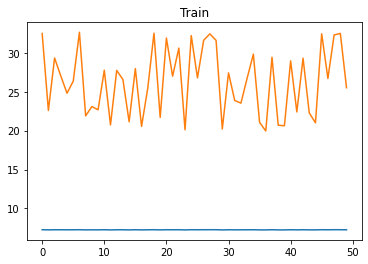

2/2 [==============================] - 19s 20ms/step


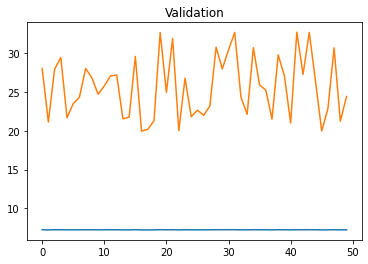

3/3 [==============================] - 4s 806ms/step


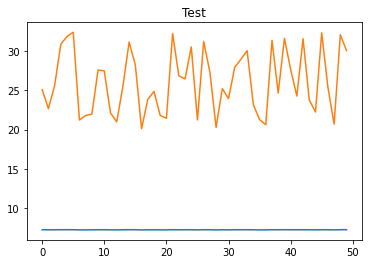

3/3 [==============================] - 0s 12ms/step


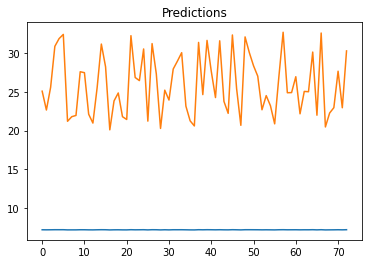

In [29]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [30]:
hybrid_cnn_lstm_mse

361.72565729404806

### RNN LSTM

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 618.8951 - root_mean_squared_error: 24.8776

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 76s 9s/step - loss: 619.5239 - root_mean_squared_error: 24.8902 - val_loss: 637.2767 - val_root_mean_squared_error: 25.2443
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 606.7550 - root_mean_squared_error: 24.6324

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 606.7550 - root_mean_squared_error: 24.6324 - val_loss: 624.4292 - val_root_mean_squared_error: 24.9886
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 594.3207 - root_mean_squared_error: 24.3787

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 50s 7s/step - loss: 594.3207 - root_mean_squared_error: 24.3787 - val_loss: 612.0155 - val_root_mean_squared_error: 24.7389
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 582.3494 - root_mean_squared_error: 24.1319

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 582.3494 - root_mean_squared_error: 24.1319 - val_loss: 599.9785 - val_root_mean_squared_error: 24.4945
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 573.1371 - root_mean_squared_error: 23.9403

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 570.7056 - root_mean_squared_error: 23.8894 - val_loss: 588.2359 - val_root_mean_squared_error: 24.2536
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 559.3117 - root_mean_squared_error: 23.6498

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 559.3117 - root_mean_squared_error: 23.6498 - val_loss: 576.6426 - val_root_mean_squared_error: 24.0134
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 548.0385 - root_mean_squared_error: 23.4102

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 68s 10s/step - loss: 548.0385 - root_mean_squared_error: 23.4102 - val_loss: 565.1102 - val_root_mean_squared_error: 23.7720
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 536.7988 - root_mean_squared_error: 23.1689

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 536.7988 - root_mean_squared_error: 23.1689 - val_loss: 553.6993 - val_root_mean_squared_error: 23.5308
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 527.8555 - root_mean_squared_error: 22.9751

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 46s 7s/step - loss: 525.7074 - root_mean_squared_error: 22.9283 - val_loss: 542.4518 - val_root_mean_squared_error: 23.2906
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 510.4973 - root_mean_squared_error: 22.5942

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 514.7842 - root_mean_squared_error: 22.6889 - val_loss: 531.3434 - val_root_mean_squared_error: 23.0509
Epoch 11/30
5/8 [=================>............] - ETA: 0s - loss: 503.2197 - root_mean_squared_error: 22.4326

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 503.9506 - root_mean_squared_error: 22.4488 - val_loss: 520.2899 - val_root_mean_squared_error: 22.8099
Epoch 12/30
6/8 [=====================>........] - ETA: 0s - loss: 499.2395 - root_mean_squared_error: 22.3437

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 52s 7s/step - loss: 493.1661 - root_mean_squared_error: 22.2073 - val_loss: 509.2097 - val_root_mean_squared_error: 22.5657
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 483.4096 - root_mean_squared_error: 21.9866

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 482.4070 - root_mean_squared_error: 21.9638 - val_loss: 498.2088 - val_root_mean_squared_error: 22.3206
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 471.8873 - root_mean_squared_error: 21.7230

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 471.6829 - root_mean_squared_error: 21.7183 - val_loss: 487.3025 - val_root_mean_squared_error: 22.0749
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 461.0959 - root_mean_squared_error: 21.4731

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 461.0959 - root_mean_squared_error: 21.4731 - val_loss: 476.5781 - val_root_mean_squared_error: 21.8307
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 450.7199 - root_mean_squared_error: 21.2302

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 450.7199 - root_mean_squared_error: 21.2302 - val_loss: 466.1276 - val_root_mean_squared_error: 21.5900
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 438.8184 - root_mean_squared_error: 20.9480

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 53s 7s/step - loss: 440.6440 - root_mean_squared_error: 20.9915 - val_loss: 456.0826 - val_root_mean_squared_error: 21.3561
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 429.8032 - root_mean_squared_error: 20.7317

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 431.0396 - root_mean_squared_error: 20.7615 - val_loss: 446.5067 - val_root_mean_squared_error: 21.1307
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 419.1829 - root_mean_squared_error: 20.4740

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 49s 7s/step - loss: 421.9361 - root_mean_squared_error: 20.5411 - val_loss: 437.5114 - val_root_mean_squared_error: 20.9168
Epoch 20/30
5/8 [=================>............] - ETA: 0s - loss: 407.6032 - root_mean_squared_error: 20.1892

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 413.4195 - root_mean_squared_error: 20.3327 - val_loss: 429.1311 - val_root_mean_squared_error: 20.7155
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 416.1703 - root_mean_squared_error: 20.4003

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 405.5471 - root_mean_squared_error: 20.1382 - val_loss: 421.3357 - val_root_mean_squared_error: 20.5265
Epoch 22/30
6/8 [=====================>........] - ETA: 0s - loss: 400.6707 - root_mean_squared_error: 20.0168

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 54s 8s/step - loss: 398.1617 - root_mean_squared_error: 19.9540 - val_loss: 414.0942 - val_root_mean_squared_error: 20.3493
Epoch 23/30
5/8 [=================>............] - ETA: 0s - loss: 382.3770 - root_mean_squared_error: 19.5545

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 391.2563 - root_mean_squared_error: 19.7802 - val_loss: 407.3577 - val_root_mean_squared_error: 20.1831
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 388.9798 - root_mean_squared_error: 19.7226

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 384.8884 - root_mean_squared_error: 19.6186 - val_loss: 401.0082 - val_root_mean_squared_error: 20.0252
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 378.8606 - root_mean_squared_error: 19.4643

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 63s 9s/step - loss: 378.8606 - root_mean_squared_error: 19.4643 - val_loss: 395.1187 - val_root_mean_squared_error: 19.8776
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 373.1189 - root_mean_squared_error: 19.3163

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 373.2635 - root_mean_squared_error: 19.3200 - val_loss: 389.5058 - val_root_mean_squared_error: 19.7359
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 367.9125 - root_mean_squared_error: 19.1810

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 51s 7s/step - loss: 367.9125 - root_mean_squared_error: 19.1810 - val_loss: 384.2086 - val_root_mean_squared_error: 19.6012
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 362.8900 - root_mean_squared_error: 19.0497

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 362.8900 - root_mean_squared_error: 19.0497 - val_loss: 379.1752 - val_root_mean_squared_error: 19.4724
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 358.1053 - root_mean_squared_error: 18.9237

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 358.1053 - root_mean_squared_error: 18.9237 - val_loss: 374.4649 - val_root_mean_squared_error: 19.3511
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 353.5977 - root_mean_squared_error: 18.8042

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 10s 19ms/step


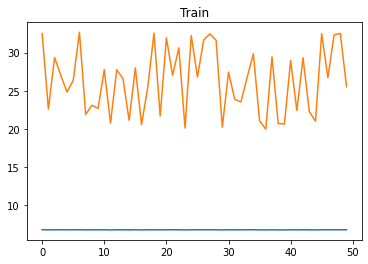

2/2 [==============================] - 4s 14ms/step


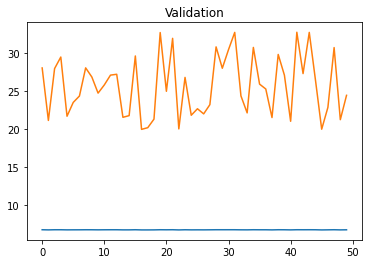

3/3 [==============================] - 0s 76ms/step


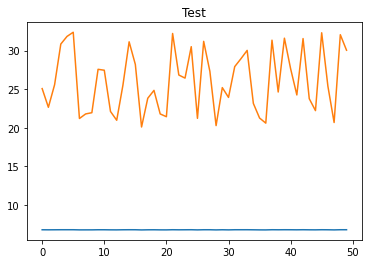

3/3 [==============================] - 0s 6ms/step


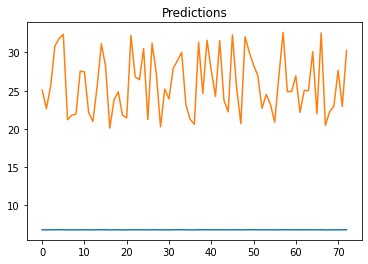

In [31]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [32]:
hybrid_rnn_lstm_mse

379.09058143421083

### RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 655.8005 - root_mean_squared_error: 25.6086

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 81s 4s/step - loss: 655.8005 - root_mean_squared_error: 25.6086 - val_loss: 672.8074 - val_root_mean_squared_error: 25.9385
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 639.9476 - root_mean_squared_error: 25.2972

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 641.2051 - root_mean_squared_error: 25.3220 - val_loss: 658.1903 - val_root_mean_squared_error: 25.6552
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 630.7009 - root_mean_squared_error: 25.1138

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 627.0717 - root_mean_squared_error: 25.0414 - val_loss: 643.9846 - val_root_mean_squared_error: 25.3769
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 613.3500 - root_mean_squared_error: 24.7659

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 613.3500 - root_mean_squared_error: 24.7659 - val_loss: 630.2967 - val_root_mean_squared_error: 25.1057
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 600.1149 - root_mean_squared_error: 24.4972

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 600.1149 - root_mean_squared_error: 24.4972 - val_loss: 617.0464 - val_root_mean_squared_error: 24.8404
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 587.2996 - root_mean_squared_error: 24.2343

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 587.2996 - root_mean_squared_error: 24.2343 - val_loss: 604.2438 - val_root_mean_squared_error: 24.5814
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 574.8708 - root_mean_squared_error: 23.9765

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 574.8708 - root_mean_squared_error: 23.9765 - val_loss: 591.8224 - val_root_mean_squared_error: 24.3274
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 561.4649 - root_mean_squared_error: 23.6953

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 562.8082 - root_mean_squared_error: 23.7236 - val_loss: 579.6370 - val_root_mean_squared_error: 24.0757
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 551.0382 - root_mean_squared_error: 23.4742

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 550.9085 - root_mean_squared_error: 23.4714 - val_loss: 567.6411 - val_root_mean_squared_error: 23.8252
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 557.8350 - root_mean_squared_error: 23.6185

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 539.3057 - root_mean_squared_error: 23.2230 - val_loss: 555.7776 - val_root_mean_squared_error: 23.5749
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 527.7158 - root_mean_squared_error: 22.9721

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 527.7158 - root_mean_squared_error: 22.9721 - val_loss: 544.1420 - val_root_mean_squared_error: 23.3269
Epoch 12/30
6/8 [=====================>........] - ETA: 0s - loss: 515.6032 - root_mean_squared_error: 22.7069

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 516.3357 - root_mean_squared_error: 22.7230 - val_loss: 532.6307 - val_root_mean_squared_error: 23.0788
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 505.0887 - root_mean_squared_error: 22.4742

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 505.0887 - root_mean_squared_error: 22.4742 - val_loss: 521.2741 - val_root_mean_squared_error: 22.8314
Epoch 14/30
5/8 [=================>............] - ETA: 0s - loss: 495.6102 - root_mean_squared_error: 22.2623

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 494.0316 - root_mean_squared_error: 22.2268 - val_loss: 510.0800 - val_root_mean_squared_error: 22.5849
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 483.1891 - root_mean_squared_error: 21.9816

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 483.1891 - root_mean_squared_error: 21.9816 - val_loss: 499.2279 - val_root_mean_squared_error: 22.3434
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 469.3118 - root_mean_squared_error: 21.6636

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 472.7046 - root_mean_squared_error: 21.7418 - val_loss: 488.7721 - val_root_mean_squared_error: 22.1082
Epoch 17/30
5/8 [=================>............] - ETA: 0s - loss: 461.7402 - root_mean_squared_error: 21.4881

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 462.6003 - root_mean_squared_error: 21.5081 - val_loss: 478.7185 - val_root_mean_squared_error: 21.8796
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 452.9653 - root_mean_squared_error: 21.2830

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 53s 8s/step - loss: 452.9653 - root_mean_squared_error: 21.2830 - val_loss: 469.1829 - val_root_mean_squared_error: 21.6606
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 443.9147 - root_mean_squared_error: 21.0693

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 443.9147 - root_mean_squared_error: 21.0693 - val_loss: 460.2539 - val_root_mean_squared_error: 21.4535
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 436.9203 - root_mean_squared_error: 20.9026

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 435.4422 - root_mean_squared_error: 20.8673 - val_loss: 451.9529 - val_root_mean_squared_error: 21.2592
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 426.5181 - root_mean_squared_error: 20.6523

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 427.5675 - root_mean_squared_error: 20.6777 - val_loss: 444.2609 - val_root_mean_squared_error: 21.0775
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 420.2680 - root_mean_squared_error: 20.5004

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 39s 5s/step - loss: 420.2680 - root_mean_squared_error: 20.5004 - val_loss: 437.1010 - val_root_mean_squared_error: 20.9070
Epoch 23/30
5/8 [=================>............] - ETA: 0s - loss: 418.8387 - root_mean_squared_error: 20.4655

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 413.5115 - root_mean_squared_error: 20.3350 - val_loss: 430.4186 - val_root_mean_squared_error: 20.7465
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 404.0780 - root_mean_squared_error: 20.1017

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 407.1429 - root_mean_squared_error: 20.1778 - val_loss: 424.1691 - val_root_mean_squared_error: 20.5954
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 401.2205 - root_mean_squared_error: 20.0305

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 39s 5s/step - loss: 401.2205 - root_mean_squared_error: 20.0305 - val_loss: 418.2617 - val_root_mean_squared_error: 20.4514
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 395.6266 - root_mean_squared_error: 19.8904

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 395.6266 - root_mean_squared_error: 19.8904 - val_loss: 412.6789 - val_root_mean_squared_error: 20.3145
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 390.3143 - root_mean_squared_error: 19.7564

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 390.3143 - root_mean_squared_error: 19.7564 - val_loss: 407.4594 - val_root_mean_squared_error: 20.1856
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 389.1891 - root_mean_squared_error: 19.7279

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 385.3700 - root_mean_squared_error: 19.6308 - val_loss: 402.4840 - val_root_mean_squared_error: 20.0620
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 382.2302 - root_mean_squared_error: 19.5507

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 380.6420 - root_mean_squared_error: 19.5100 - val_loss: 397.7645 - val_root_mean_squared_error: 19.9440
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 376.1511 - root_mean_squared_error: 19.3946

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 14ms/step


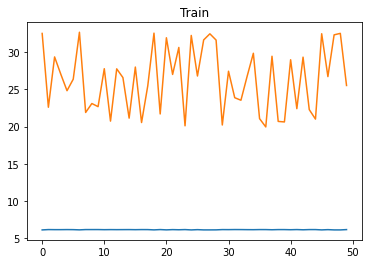

2/2 [==============================] - 5s 36ms/step


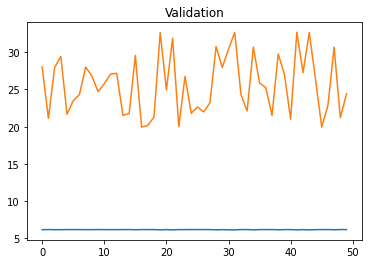

3/3 [==============================] - 0s 39ms/step


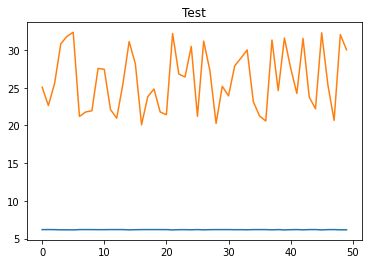

3/3 [==============================] - 0s 11ms/step


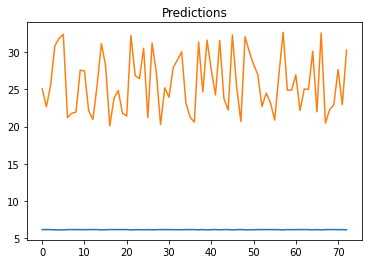

In [33]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [34]:
hybrid_rnn_gru_mse

402.70018286673337

### CNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 614.0677 - root_mean_squared_error: 24.7804

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 116s 12s/step - loss: 614.0677 - root_mean_squared_error: 24.7804 - val_loss: 627.3380 - val_root_mean_squared_error: 25.0467
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 594.2674 - root_mean_squared_error: 24.3776

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 69s 10s/step - loss: 594.2674 - root_mean_squared_error: 24.3776 - val_loss: 607.3566 - val_root_mean_squared_error: 24.6446
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 574.8339 - root_mean_squared_error: 23.9757

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 74s 10s/step - loss: 574.8339 - root_mean_squared_error: 23.9757 - val_loss: 588.0340 - val_root_mean_squared_error: 24.2494
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 556.2135 - root_mean_squared_error: 23.5842

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 63s 9s/step - loss: 556.2135 - root_mean_squared_error: 23.5842 - val_loss: 569.4072 - val_root_mean_squared_error: 23.8623
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 538.1937 - root_mean_squared_error: 23.1990

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 538.1937 - root_mean_squared_error: 23.1990 - val_loss: 551.3901 - val_root_mean_squared_error: 23.4817
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 520.8112 - root_mean_squared_error: 22.8213

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 77s 11s/step - loss: 520.8112 - root_mean_squared_error: 22.8213 - val_loss: 533.9880 - val_root_mean_squared_error: 23.1082
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 504.0959 - root_mean_squared_error: 22.4521

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 88s 12s/step - loss: 504.0959 - root_mean_squared_error: 22.4521 - val_loss: 517.4451 - val_root_mean_squared_error: 22.7474
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 488.4181 - root_mean_squared_error: 22.1002

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 488.4181 - root_mean_squared_error: 22.1002 - val_loss: 502.0062 - val_root_mean_squared_error: 22.4055
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 476.5129 - root_mean_squared_error: 21.8292

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 74s 11s/step - loss: 473.8981 - root_mean_squared_error: 21.7692 - val_loss: 488.1004 - val_root_mean_squared_error: 22.0930
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 461.0286 - root_mean_squared_error: 21.4716

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 73s 10s/step - loss: 461.0286 - root_mean_squared_error: 21.4716 - val_loss: 475.7167 - val_root_mean_squared_error: 21.8109
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 449.5350 - root_mean_squared_error: 21.2022

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 79s 11s/step - loss: 449.5350 - root_mean_squared_error: 21.2022 - val_loss: 464.7530 - val_root_mean_squared_error: 21.5581
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 439.4002 - root_mean_squared_error: 20.9619

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 59s 8s/step - loss: 439.4002 - root_mean_squared_error: 20.9619 - val_loss: 455.0561 - val_root_mean_squared_error: 21.3320
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 430.3731 - root_mean_squared_error: 20.7454

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 78s 11s/step - loss: 430.3731 - root_mean_squared_error: 20.7454 - val_loss: 446.4806 - val_root_mean_squared_error: 21.1301
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 421.0285 - root_mean_squared_error: 20.5190

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 77s 11s/step - loss: 422.3715 - root_mean_squared_error: 20.5517 - val_loss: 438.7202 - val_root_mean_squared_error: 20.9457
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 415.0846 - root_mean_squared_error: 20.3736

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 415.0846 - root_mean_squared_error: 20.3736 - val_loss: 431.6937 - val_root_mean_squared_error: 20.7772
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 408.5048 - root_mean_squared_error: 20.2115

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 83s 11s/step - loss: 408.5048 - root_mean_squared_error: 20.2115 - val_loss: 425.3311 - val_root_mean_squared_error: 20.6236
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 402.5231 - root_mean_squared_error: 20.0630

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 58s 8s/step - loss: 402.5231 - root_mean_squared_error: 20.0630 - val_loss: 419.5602 - val_root_mean_squared_error: 20.4832
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 397.0728 - root_mean_squared_error: 19.9267

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 75s 10s/step - loss: 397.0728 - root_mean_squared_error: 19.9267 - val_loss: 414.1811 - val_root_mean_squared_error: 20.3514
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 391.9711 - root_mean_squared_error: 19.7983

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 57s 8s/step - loss: 391.9711 - root_mean_squared_error: 19.7983 - val_loss: 409.1332 - val_root_mean_squared_error: 20.2270
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 387.1147 - root_mean_squared_error: 19.6752

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 63s 9s/step - loss: 387.1147 - root_mean_squared_error: 19.6752 - val_loss: 404.3085 - val_root_mean_squared_error: 20.1074
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 382.4684 - root_mean_squared_error: 19.5568

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 382.4684 - root_mean_squared_error: 19.5568 - val_loss: 399.5974 - val_root_mean_squared_error: 19.9899
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 379.0139 - root_mean_squared_error: 19.4683

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 64s 9s/step - loss: 377.9553 - root_mean_squared_error: 19.4411 - val_loss: 394.9947 - val_root_mean_squared_error: 19.8745
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 373.4975 - root_mean_squared_error: 19.3261

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 74s 10s/step - loss: 373.4975 - root_mean_squared_error: 19.3261 - val_loss: 390.5528 - val_root_mean_squared_error: 19.7624
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 369.2456 - root_mean_squared_error: 19.2158

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 64s 9s/step - loss: 369.2456 - root_mean_squared_error: 19.2158 - val_loss: 386.2995 - val_root_mean_squared_error: 19.6545
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 365.1913 - root_mean_squared_error: 19.1100

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 75s 11s/step - loss: 365.1913 - root_mean_squared_error: 19.1100 - val_loss: 382.2563 - val_root_mean_squared_error: 19.5514
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 361.3297 - root_mean_squared_error: 19.0087

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 53s 7s/step - loss: 361.3297 - root_mean_squared_error: 19.0087 - val_loss: 378.4420 - val_root_mean_squared_error: 19.4536
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 357.7048 - root_mean_squared_error: 18.9131

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 67s 10s/step - loss: 357.7048 - root_mean_squared_error: 18.9131 - val_loss: 374.7763 - val_root_mean_squared_error: 19.3591
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 354.2018 - root_mean_squared_error: 18.8202

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 66s 9s/step - loss: 354.2018 - root_mean_squared_error: 18.8202 - val_loss: 371.2696 - val_root_mean_squared_error: 19.2684
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 350.8372 - root_mean_squared_error: 18.7306

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 350.8372 - root_mean_squared_error: 18.7306 - val_loss: 367.9180 - val_root_mean_squared_error: 19.1812
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 347.6543 - root_mean_squared_error: 18.6455

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 6s 27ms/step


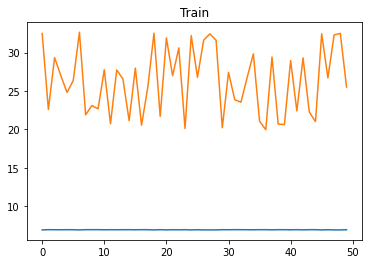

2/2 [==============================] - 7s 19ms/step


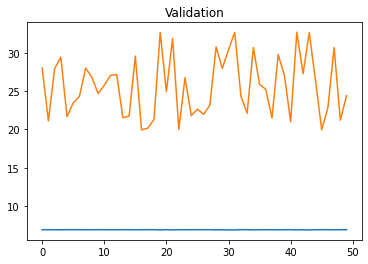

3/3 [==============================] - 0s 16ms/step


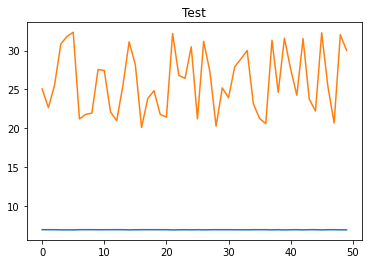

3/3 [==============================] - 0s 12ms/step


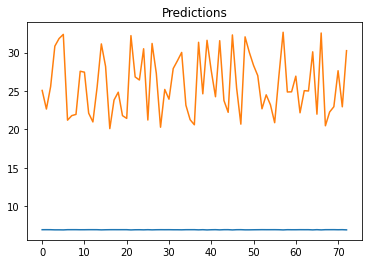

In [35]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [36]:
hybrid_cnn_gru_mse

373.7807440903948

### CNN RNN GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 716.9286 - root_mean_squared_error: 26.7755

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 91s 10s/step - loss: 715.6174 - root_mean_squared_error: 26.7510 - val_loss: 713.9594 - val_root_mean_squared_error: 26.7200
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 667.8699 - root_mean_squared_error: 25.8432

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 667.8699 - root_mean_squared_error: 25.8432 - val_loss: 666.2861 - val_root_mean_squared_error: 25.8125
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 623.1651 - root_mean_squared_error: 24.9633

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 67s 10s/step - loss: 622.3592 - root_mean_squared_error: 24.9471 - val_loss: 622.6280 - val_root_mean_squared_error: 24.9525
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 581.5021 - root_mean_squared_error: 24.1144

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 581.5021 - root_mean_squared_error: 24.1144 - val_loss: 583.6458 - val_root_mean_squared_error: 24.1588
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 545.1871 - root_mean_squared_error: 23.3492

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 545.1871 - root_mean_squared_error: 23.3492 - val_loss: 549.7991 - val_root_mean_squared_error: 23.4478
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 514.0983 - root_mean_squared_error: 22.6737

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 514.0983 - root_mean_squared_error: 22.6737 - val_loss: 520.3386 - val_root_mean_squared_error: 22.8109
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 486.8306 - root_mean_squared_error: 22.0642

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 49s 6s/step - loss: 486.8306 - root_mean_squared_error: 22.0642 - val_loss: 494.1582 - val_root_mean_squared_error: 22.2297
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 462.1424 - root_mean_squared_error: 21.4975

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 462.1424 - root_mean_squared_error: 21.4975 - val_loss: 470.0878 - val_root_mean_squared_error: 21.6815
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 439.3788 - root_mean_squared_error: 20.9614

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 48s 6s/step - loss: 439.3788 - root_mean_squared_error: 20.9614 - val_loss: 447.2869 - val_root_mean_squared_error: 21.1492
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 417.8365 - root_mean_squared_error: 20.4410

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 417.8365 - root_mean_squared_error: 20.4410 - val_loss: 426.0681 - val_root_mean_squared_error: 20.6414
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 397.8190 - root_mean_squared_error: 19.9454

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 39s 5s/step - loss: 397.8190 - root_mean_squared_error: 19.9454 - val_loss: 406.7968 - val_root_mean_squared_error: 20.1692
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 380.0317 - root_mean_squared_error: 19.4944

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 380.0317 - root_mean_squared_error: 19.4944 - val_loss: 389.6596 - val_root_mean_squared_error: 19.7398
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 367.0905 - root_mean_squared_error: 19.1596

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 364.1898 - root_mean_squared_error: 19.0838 - val_loss: 374.6701 - val_root_mean_squared_error: 19.3564
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 350.3193 - root_mean_squared_error: 18.7168

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 350.3193 - root_mean_squared_error: 18.7168 - val_loss: 361.3791 - val_root_mean_squared_error: 19.0100
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 337.8416 - root_mean_squared_error: 18.3805

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 52s 6s/step - loss: 337.8416 - root_mean_squared_error: 18.3805 - val_loss: 349.1739 - val_root_mean_squared_error: 18.6862
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 326.2661 - root_mean_squared_error: 18.0628

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 64s 9s/step - loss: 326.2661 - root_mean_squared_error: 18.0628 - val_loss: 337.7710 - val_root_mean_squared_error: 18.3785
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 316.1264 - root_mean_squared_error: 17.7799

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 315.4742 - root_mean_squared_error: 17.7616 - val_loss: 326.9393 - val_root_mean_squared_error: 18.0815
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 305.1913 - root_mean_squared_error: 17.4697

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 305.1913 - root_mean_squared_error: 17.4697 - val_loss: 316.6929 - val_root_mean_squared_error: 17.7959
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 295.4971 - root_mean_squared_error: 17.1900

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 295.4971 - root_mean_squared_error: 17.1900 - val_loss: 307.1724 - val_root_mean_squared_error: 17.5263
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 286.6076 - root_mean_squared_error: 16.9295

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 62s 8s/step - loss: 286.6076 - root_mean_squared_error: 16.9295 - val_loss: 298.4085 - val_root_mean_squared_error: 17.2745
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 278.4007 - root_mean_squared_error: 16.6853

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 278.4007 - root_mean_squared_error: 16.6853 - val_loss: 290.2888 - val_root_mean_squared_error: 17.0379
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 267.1545 - root_mean_squared_error: 16.3449

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 270.7836 - root_mean_squared_error: 16.4555 - val_loss: 282.7352 - val_root_mean_squared_error: 16.8147
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 263.5969 - root_mean_squared_error: 16.2357

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 263.5969 - root_mean_squared_error: 16.2357 - val_loss: 275.6053 - val_root_mean_squared_error: 16.6014
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 256.0248 - root_mean_squared_error: 16.0008

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 256.8868 - root_mean_squared_error: 16.0277 - val_loss: 268.8773 - val_root_mean_squared_error: 16.3975
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 250.5104 - root_mean_squared_error: 15.8275

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 250.5104 - root_mean_squared_error: 15.8275 - val_loss: 262.4754 - val_root_mean_squared_error: 16.2011
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 244.4692 - root_mean_squared_error: 15.6355

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 244.4692 - root_mean_squared_error: 15.6355 - val_loss: 256.3851 - val_root_mean_squared_error: 16.0120
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 238.6872 - root_mean_squared_error: 15.4495

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 238.6872 - root_mean_squared_error: 15.4495 - val_loss: 250.5721 - val_root_mean_squared_error: 15.8295
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 233.1857 - root_mean_squared_error: 15.2704

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 233.1857 - root_mean_squared_error: 15.2704 - val_loss: 244.9441 - val_root_mean_squared_error: 15.6507
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 227.7825 - root_mean_squared_error: 15.0925

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 57s 8s/step - loss: 227.7825 - root_mean_squared_error: 15.0925 - val_loss: 239.5206 - val_root_mean_squared_error: 15.4765
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 222.5898 - root_mean_squared_error: 14.9194

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 11s 49ms/step


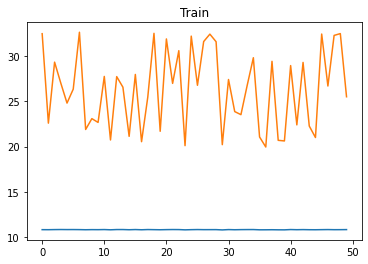

2/2 [==============================] - 3s 17ms/step


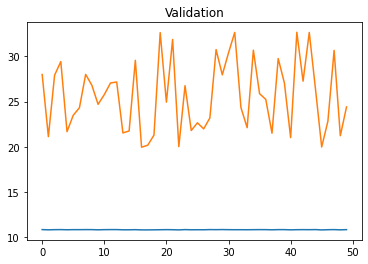

3/3 [==============================] - 0s 20ms/step


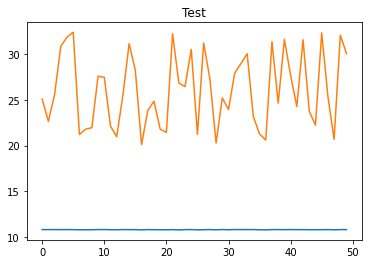

3/3 [==============================] - 0s 30ms/step


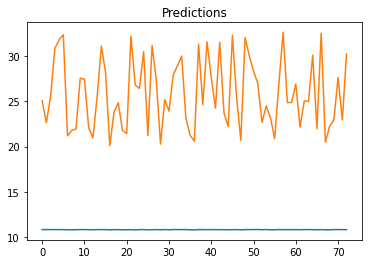

In [37]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [38]:
hybrid_cnn_rnn_gru_mse

241.55674731911296

### LSTM RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 635.8915 - root_mean_squared_error: 25.2169

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 154s 14s/step - loss: 635.8915 - root_mean_squared_error: 25.2169 - val_loss: 649.3634 - val_root_mean_squared_error: 25.4826
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 615.6126 - root_mean_squared_error: 24.8115

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 90s 13s/step - loss: 615.6126 - root_mean_squared_error: 24.8115 - val_loss: 628.3232 - val_root_mean_squared_error: 25.0664
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 595.2267 - root_mean_squared_error: 24.3973

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 95s 14s/step - loss: 594.6860 - root_mean_squared_error: 24.3862 - val_loss: 605.9520 - val_root_mean_squared_error: 24.6161
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 570.2665 - root_mean_squared_error: 23.8803

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 81s 11s/step - loss: 572.1134 - root_mean_squared_error: 23.9189 - val_loss: 581.5601 - val_root_mean_squared_error: 24.1156
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 547.3226 - root_mean_squared_error: 23.3949

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 99s 14s/step - loss: 547.3226 - root_mean_squared_error: 23.3949 - val_loss: 554.7049 - val_root_mean_squared_error: 23.5522
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 522.0145 - root_mean_squared_error: 22.8476

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 86s 12s/step - loss: 520.1603 - root_mean_squared_error: 22.8070 - val_loss: 525.3535 - val_root_mean_squared_error: 22.9206
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 490.6694 - root_mean_squared_error: 22.1511

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 84s 12s/step - loss: 490.6694 - root_mean_squared_error: 22.1511 - val_loss: 494.0467 - val_root_mean_squared_error: 22.2272
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 459.6943 - root_mean_squared_error: 21.4405

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 97s 14s/step - loss: 459.6943 - root_mean_squared_error: 21.4405 - val_loss: 461.4766 - val_root_mean_squared_error: 21.4820
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 427.7748 - root_mean_squared_error: 20.6827

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 91s 13s/step - loss: 427.7748 - root_mean_squared_error: 20.6827 - val_loss: 429.0616 - val_root_mean_squared_error: 20.7138
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 396.8941 - root_mean_squared_error: 19.9222

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 109s 16s/step - loss: 396.8941 - root_mean_squared_error: 19.9222 - val_loss: 398.2254 - val_root_mean_squared_error: 19.9556
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 367.8445 - root_mean_squared_error: 19.1793

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 75s 11s/step - loss: 367.8445 - root_mean_squared_error: 19.1793 - val_loss: 370.7668 - val_root_mean_squared_error: 19.2553
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 342.6450 - root_mean_squared_error: 18.5107

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 110s 16s/step - loss: 342.6450 - root_mean_squared_error: 18.5107 - val_loss: 347.4248 - val_root_mean_squared_error: 18.6393
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 321.6969 - root_mean_squared_error: 17.9359

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 71s 10s/step - loss: 321.6969 - root_mean_squared_error: 17.9359 - val_loss: 328.4888 - val_root_mean_squared_error: 18.1243
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 304.8573 - root_mean_squared_error: 17.4602

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 129s 18s/step - loss: 304.8573 - root_mean_squared_error: 17.4602 - val_loss: 313.6910 - val_root_mean_squared_error: 17.7113
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 291.8202 - root_mean_squared_error: 17.0827

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 85s 12s/step - loss: 291.8202 - root_mean_squared_error: 17.0827 - val_loss: 302.2495 - val_root_mean_squared_error: 17.3853
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 281.7921 - root_mean_squared_error: 16.7867

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 95s 14s/step - loss: 281.7921 - root_mean_squared_error: 16.7867 - val_loss: 293.3794 - val_root_mean_squared_error: 17.1283
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 273.9586 - root_mean_squared_error: 16.5517

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 94s 13s/step - loss: 273.9586 - root_mean_squared_error: 16.5517 - val_loss: 286.4018 - val_root_mean_squared_error: 16.9234
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 267.7300 - root_mean_squared_error: 16.3625

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 111s 16s/step - loss: 267.7300 - root_mean_squared_error: 16.3625 - val_loss: 280.7357 - val_root_mean_squared_error: 16.7552
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 261.4181 - root_mean_squared_error: 16.1684

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 82s 12s/step - loss: 262.6064 - root_mean_squared_error: 16.2051 - val_loss: 275.9884 - val_root_mean_squared_error: 16.6129
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 258.2520 - root_mean_squared_error: 16.0702

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 119s 17s/step - loss: 258.2520 - root_mean_squared_error: 16.0702 - val_loss: 271.9103 - val_root_mean_squared_error: 16.4897
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 254.5119 - root_mean_squared_error: 15.9534

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 72s 10s/step - loss: 254.5119 - root_mean_squared_error: 15.9534 - val_loss: 268.3158 - val_root_mean_squared_error: 16.3803
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 248.9239 - root_mean_squared_error: 15.7773

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 89s 13s/step - loss: 251.1636 - root_mean_squared_error: 15.8481 - val_loss: 265.0617 - val_root_mean_squared_error: 16.2807
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 248.1269 - root_mean_squared_error: 15.7520

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 105s 15s/step - loss: 248.1269 - root_mean_squared_error: 15.7520 - val_loss: 262.0695 - val_root_mean_squared_error: 16.1886
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 245.7830 - root_mean_squared_error: 15.6775

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 81s 12s/step - loss: 245.3129 - root_mean_squared_error: 15.6625 - val_loss: 259.2963 - val_root_mean_squared_error: 16.1027
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 242.7032 - root_mean_squared_error: 15.5789

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 89s 13s/step - loss: 242.7032 - root_mean_squared_error: 15.5789 - val_loss: 256.7084 - val_root_mean_squared_error: 16.0221
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 239.9693 - root_mean_squared_error: 15.4909

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 83s 12s/step - loss: 240.2637 - root_mean_squared_error: 15.5004 - val_loss: 254.2522 - val_root_mean_squared_error: 15.9453
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 237.9283 - root_mean_squared_error: 15.4249

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 93s 13s/step - loss: 237.9283 - root_mean_squared_error: 15.4249 - val_loss: 251.9189 - val_root_mean_squared_error: 15.8720
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 235.7015 - root_mean_squared_error: 15.3526

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 87s 12s/step - loss: 235.7015 - root_mean_squared_error: 15.3526 - val_loss: 249.6796 - val_root_mean_squared_error: 15.8013
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 233.5724 - root_mean_squared_error: 15.2831

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 88s 13s/step - loss: 233.5724 - root_mean_squared_error: 15.2831 - val_loss: 247.5081 - val_root_mean_squared_error: 15.7324
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 231.6025 - root_mean_squared_error: 15.2185

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 15s 25ms/step


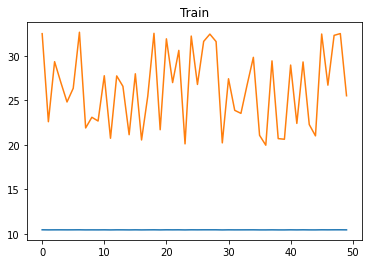

2/2 [==============================] - 9s 15ms/step


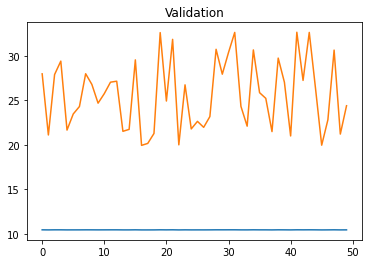

3/3 [==============================] - 2s 409ms/step


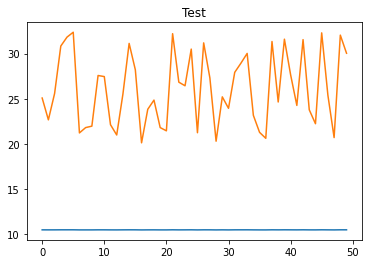

3/3 [==============================] - 0s 16ms/step


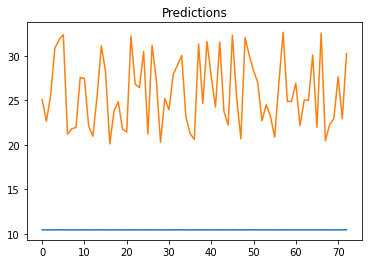

In [39]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [40]:
hybrid_lstm_rnn_gru_mse

252.88441043783624

## Moving Average

### CNN LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 678.5400 - root_mean_squared_error: 26.0488

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 122s 13s/step - loss: 678.5400 - root_mean_squared_error: 26.0488 - val_loss: 698.5333 - val_root_mean_squared_error: 26.4298
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 667.5869 - root_mean_squared_error: 25.8377

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 99s 14s/step - loss: 665.2029 - root_mean_squared_error: 25.7915 - val_loss: 685.2644 - val_root_mean_squared_error: 26.1776
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 654.4894 - root_mean_squared_error: 25.5830

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 92s 13s/step - loss: 652.1586 - root_mean_squared_error: 25.5374 - val_loss: 672.1757 - val_root_mean_squared_error: 25.9264
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 639.2878 - root_mean_squared_error: 25.2841

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 90s 13s/step - loss: 639.2878 - root_mean_squared_error: 25.2841 - val_loss: 659.2975 - val_root_mean_squared_error: 25.6768
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 626.5869 - root_mean_squared_error: 25.0317

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 84s 12s/step - loss: 626.5869 - root_mean_squared_error: 25.0317 - val_loss: 646.2958 - val_root_mean_squared_error: 25.4223
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 611.2918 - root_mean_squared_error: 24.7243

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 95s 13s/step - loss: 613.6174 - root_mean_squared_error: 24.7713 - val_loss: 632.7675 - val_root_mean_squared_error: 25.1549
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 600.0358 - root_mean_squared_error: 24.4956

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 90s 13s/step - loss: 600.0358 - root_mean_squared_error: 24.4956 - val_loss: 618.6035 - val_root_mean_squared_error: 24.8717
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 586.0266 - root_mean_squared_error: 24.2080

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 92s 13s/step - loss: 586.0266 - root_mean_squared_error: 24.2080 - val_loss: 604.0772 - val_root_mean_squared_error: 24.5780
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 571.7256 - root_mean_squared_error: 23.9108

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 86s 12s/step - loss: 571.7256 - root_mean_squared_error: 23.9108 - val_loss: 589.4908 - val_root_mean_squared_error: 24.2794
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 557.6196 - root_mean_squared_error: 23.6140

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 80s 11s/step - loss: 557.6196 - root_mean_squared_error: 23.6140 - val_loss: 575.3167 - val_root_mean_squared_error: 23.9858
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 544.0679 - root_mean_squared_error: 23.3253

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 78s 11s/step - loss: 544.0679 - root_mean_squared_error: 23.3253 - val_loss: 561.7577 - val_root_mean_squared_error: 23.7014
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 531.0983 - root_mean_squared_error: 23.0456

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 94s 13s/step - loss: 531.0983 - root_mean_squared_error: 23.0456 - val_loss: 548.8762 - val_root_mean_squared_error: 23.4281
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 520.8782 - root_mean_squared_error: 22.8228

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 106s 15s/step - loss: 518.8013 - root_mean_squared_error: 22.7772 - val_loss: 536.6219 - val_root_mean_squared_error: 23.1651
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 508.9732 - root_mean_squared_error: 22.5604

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 70s 10s/step - loss: 507.0929 - root_mean_squared_error: 22.5187 - val_loss: 524.8687 - val_root_mean_squared_error: 22.9100
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 495.8013 - root_mean_squared_error: 22.2666

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 99s 13s/step - loss: 495.8013 - root_mean_squared_error: 22.2666 - val_loss: 513.5328 - val_root_mean_squared_error: 22.6613
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 484.8712 - root_mean_squared_error: 22.0198

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 77s 11s/step - loss: 484.8712 - root_mean_squared_error: 22.0198 - val_loss: 502.5550 - val_root_mean_squared_error: 22.4177
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 474.4031 - root_mean_squared_error: 21.7808

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 105s 14s/step - loss: 474.4031 - root_mean_squared_error: 21.7808 - val_loss: 491.8878 - val_root_mean_squared_error: 22.1785
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 464.1988 - root_mean_squared_error: 21.5453

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 70s 10s/step - loss: 464.1988 - root_mean_squared_error: 21.5453 - val_loss: 481.7744 - val_root_mean_squared_error: 21.9494
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 454.6475 - root_mean_squared_error: 21.3225

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 82s 11s/step - loss: 454.6475 - root_mean_squared_error: 21.3225 - val_loss: 472.2556 - val_root_mean_squared_error: 21.7314
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 445.6830 - root_mean_squared_error: 21.1112

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 68s 10s/step - loss: 445.6830 - root_mean_squared_error: 21.1112 - val_loss: 463.3490 - val_root_mean_squared_error: 21.5255
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 437.2510 - root_mean_squared_error: 20.9105

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 99s 14s/step - loss: 437.2510 - root_mean_squared_error: 20.9105 - val_loss: 454.9460 - val_root_mean_squared_error: 21.3295
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 429.2310 - root_mean_squared_error: 20.7179

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 71s 10s/step - loss: 429.2310 - root_mean_squared_error: 20.7179 - val_loss: 446.9120 - val_root_mean_squared_error: 21.1403
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 419.7282 - root_mean_squared_error: 20.4873

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 73s 10s/step - loss: 421.5479 - root_mean_squared_error: 20.5316 - val_loss: 439.1328 - val_root_mean_squared_error: 20.9555
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 414.1094 - root_mean_squared_error: 20.3497

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 86s 12s/step - loss: 414.1094 - root_mean_squared_error: 20.3497 - val_loss: 431.5020 - val_root_mean_squared_error: 20.7726
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 406.7794 - root_mean_squared_error: 20.1688

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 77s 11s/step - loss: 406.7794 - root_mean_squared_error: 20.1688 - val_loss: 424.0700 - val_root_mean_squared_error: 20.5930
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 399.7025 - root_mean_squared_error: 19.9926

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 79s 11s/step - loss: 399.7025 - root_mean_squared_error: 19.9926 - val_loss: 416.9070 - val_root_mean_squared_error: 20.4183
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 392.8623 - root_mean_squared_error: 19.8208

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 73s 10s/step - loss: 392.8623 - root_mean_squared_error: 19.8208 - val_loss: 410.1603 - val_root_mean_squared_error: 20.2524
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 386.4888 - root_mean_squared_error: 19.6593

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 92s 13s/step - loss: 386.4888 - root_mean_squared_error: 19.6593 - val_loss: 403.8297 - val_root_mean_squared_error: 20.0955
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 380.5110 - root_mean_squared_error: 19.5067

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 88s 13s/step - loss: 380.5110 - root_mean_squared_error: 19.5067 - val_loss: 397.9730 - val_root_mean_squared_error: 19.9493
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 375.0260 - root_mean_squared_error: 19.3656

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 11s 95ms/step


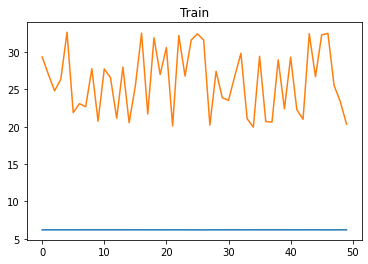

2/2 [==============================] - 10s 351ms/step


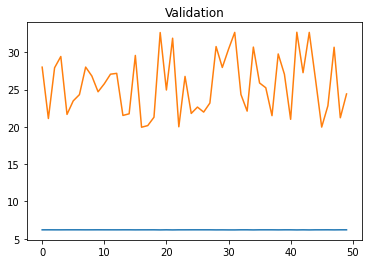

3/3 [==============================] - 0s 102ms/step


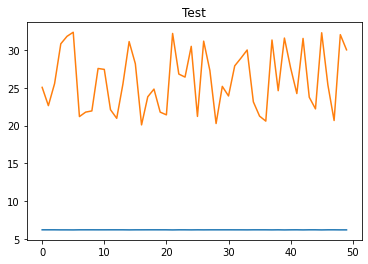

3/3 [==============================] - 0s 17ms/step


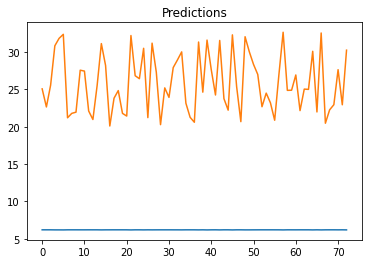

In [41]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [42]:
mavg_hybrid_cnn_lstm_mse

401.9435192459247

### RNN LSTM

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 646.3284 - root_mean_squared_error: 25.4230

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 127s 14s/step - loss: 645.2285 - root_mean_squared_error: 25.4013 - val_loss: 666.6139 - val_root_mean_squared_error: 25.8189
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 641.1057 - root_mean_squared_error: 25.3201

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 54s 8s/step - loss: 635.5481 - root_mean_squared_error: 25.2101 - val_loss: 656.8874 - val_root_mean_squared_error: 25.6298
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 626.1022 - root_mean_squared_error: 25.0220

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 626.1022 - root_mean_squared_error: 25.0220 - val_loss: 647.4973 - val_root_mean_squared_error: 25.4460
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 617.0565 - root_mean_squared_error: 24.8406

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 617.0565 - root_mean_squared_error: 24.8406 - val_loss: 638.3978 - val_root_mean_squared_error: 25.2665
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 608.2395 - root_mean_squared_error: 24.6625

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 56s 8s/step - loss: 608.2395 - root_mean_squared_error: 24.6625 - val_loss: 629.5256 - val_root_mean_squared_error: 25.0903
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 599.6268 - root_mean_squared_error: 24.4873

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 599.6268 - root_mean_squared_error: 24.4873 - val_loss: 620.8492 - val_root_mean_squared_error: 24.9168
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 589.7765 - root_mean_squared_error: 24.2853

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 591.1785 - root_mean_squared_error: 24.3142 - val_loss: 612.3177 - val_root_mean_squared_error: 24.7451
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 582.8857 - root_mean_squared_error: 24.1430

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 61s 9s/step - loss: 582.8857 - root_mean_squared_error: 24.1430 - val_loss: 603.8777 - val_root_mean_squared_error: 24.5739
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 569.5300 - root_mean_squared_error: 23.8648

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 574.6575 - root_mean_squared_error: 23.9720 - val_loss: 595.5959 - val_root_mean_squared_error: 24.4048
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 566.6210 - root_mean_squared_error: 23.8038

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 59s 8s/step - loss: 566.6210 - root_mean_squared_error: 23.8038 - val_loss: 587.4053 - val_root_mean_squared_error: 24.2364
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 558.6691 - root_mean_squared_error: 23.6362

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 62s 9s/step - loss: 558.6691 - root_mean_squared_error: 23.6362 - val_loss: 579.3885 - val_root_mean_squared_error: 24.0705
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 550.9485 - root_mean_squared_error: 23.4723

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 550.9485 - root_mean_squared_error: 23.4723 - val_loss: 571.5209 - val_root_mean_squared_error: 23.9065
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 549.7773 - root_mean_squared_error: 23.4473

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 543.3251 - root_mean_squared_error: 23.3093 - val_loss: 563.8790 - val_root_mean_squared_error: 23.7461
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 531.5736 - root_mean_squared_error: 23.0559

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 58s 8s/step - loss: 535.8960 - root_mean_squared_error: 23.1494 - val_loss: 556.4469 - val_root_mean_squared_error: 23.5891
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 530.5943 - root_mean_squared_error: 23.0346

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 528.7404 - root_mean_squared_error: 22.9944 - val_loss: 549.2023 - val_root_mean_squared_error: 23.4351
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 521.7486 - root_mean_squared_error: 22.8418

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 54s 8s/step - loss: 521.7486 - root_mean_squared_error: 22.8418 - val_loss: 542.1874 - val_root_mean_squared_error: 23.2849
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 514.9138 - root_mean_squared_error: 22.6917

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 58s 8s/step - loss: 514.9138 - root_mean_squared_error: 22.6917 - val_loss: 535.4045 - val_root_mean_squared_error: 23.1388
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 507.5750 - root_mean_squared_error: 22.5294

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 508.3755 - root_mean_squared_error: 22.5472 - val_loss: 528.8546 - val_root_mean_squared_error: 22.9968
Epoch 19/30
5/8 [=================>............] - ETA: 0s - loss: 509.7537 - root_mean_squared_error: 22.5777

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 62s 9s/step - loss: 502.1201 - root_mean_squared_error: 22.4080 - val_loss: 522.6290 - val_root_mean_squared_error: 22.8611
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 496.1027 - root_mean_squared_error: 22.2734

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 496.1027 - root_mean_squared_error: 22.2734 - val_loss: 516.7755 - val_root_mean_squared_error: 22.7327
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 491.8717 - root_mean_squared_error: 22.1782

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 490.5199 - root_mean_squared_error: 22.1477 - val_loss: 511.2144 - val_root_mean_squared_error: 22.6101
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 485.2058 - root_mean_squared_error: 22.0274

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 46s 7s/step - loss: 485.2058 - root_mean_squared_error: 22.0274 - val_loss: 505.9225 - val_root_mean_squared_error: 22.4927
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 480.1270 - root_mean_squared_error: 21.9118

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 59s 8s/step - loss: 480.1270 - root_mean_squared_error: 21.9118 - val_loss: 500.8436 - val_root_mean_squared_error: 22.3795
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 475.7338 - root_mean_squared_error: 21.8113

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 475.2122 - root_mean_squared_error: 21.7994 - val_loss: 495.9105 - val_root_mean_squared_error: 22.2690
Epoch 25/30
6/8 [=====================>........] - ETA: 0s - loss: 470.8909 - root_mean_squared_error: 21.7000

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 49s 7s/step - loss: 470.4583 - root_mean_squared_error: 21.6901 - val_loss: 491.0664 - val_root_mean_squared_error: 22.1600
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 467.6507 - root_mean_squared_error: 21.6252

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 61s 9s/step - loss: 465.7543 - root_mean_squared_error: 21.5813 - val_loss: 486.2751 - val_root_mean_squared_error: 22.0516
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 461.0636 - root_mean_squared_error: 21.4724

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 461.0636 - root_mean_squared_error: 21.4724 - val_loss: 481.5199 - val_root_mean_squared_error: 21.9436
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 454.7468 - root_mean_squared_error: 21.3248

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 456.3987 - root_mean_squared_error: 21.3635 - val_loss: 476.6814 - val_root_mean_squared_error: 21.8330
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 451.6351 - root_mean_squared_error: 21.2517

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 46s 6s/step - loss: 451.6351 - root_mean_squared_error: 21.2517 - val_loss: 471.7479 - val_root_mean_squared_error: 21.7198
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 445.6342 - root_mean_squared_error: 21.1100

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 3s 9ms/step


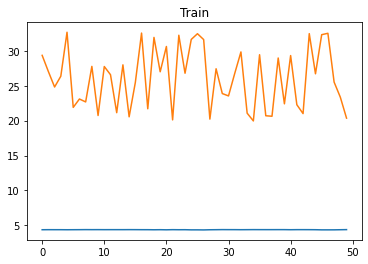

2/2 [==============================] - 2s 22ms/step


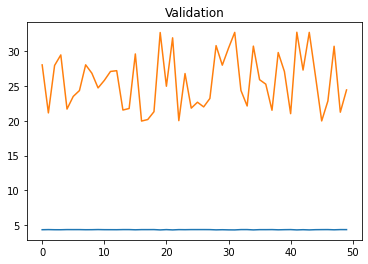

3/3 [==============================] - 0s 15ms/step


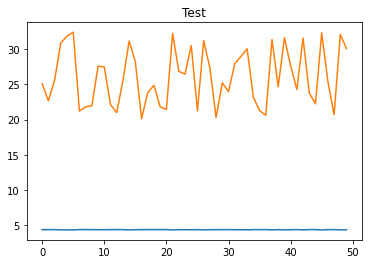

3/3 [==============================] - 0s 9ms/step


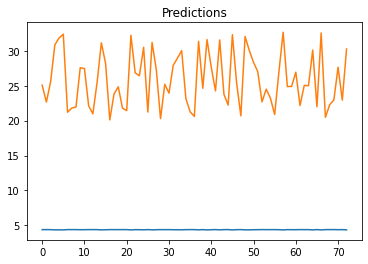

In [43]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [44]:
mavg_hybrid_rnn_lstm_mse

476.8792062398593

### RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 649.5870 - root_mean_squared_error: 25.4870

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 104s 10s/step - loss: 649.5870 - root_mean_squared_error: 25.4870 - val_loss: 667.6920 - val_root_mean_squared_error: 25.8397
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 634.0797 - root_mean_squared_error: 25.1809

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 634.0797 - root_mean_squared_error: 25.1809 - val_loss: 652.0262 - val_root_mean_squared_error: 25.5348
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 618.8969 - root_mean_squared_error: 24.8776

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 618.8969 - root_mean_squared_error: 24.8776 - val_loss: 636.6503 - val_root_mean_squared_error: 25.2319
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 603.9263 - root_mean_squared_error: 24.5749

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 603.9263 - root_mean_squared_error: 24.5749 - val_loss: 621.5376 - val_root_mean_squared_error: 24.9307
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 588.0918 - root_mean_squared_error: 24.2506

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 60s 8s/step - loss: 589.1821 - root_mean_squared_error: 24.2731 - val_loss: 606.6663 - val_root_mean_squared_error: 24.6306
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 574.5514 - root_mean_squared_error: 23.9698

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 574.7941 - root_mean_squared_error: 23.9749 - val_loss: 592.0580 - val_root_mean_squared_error: 24.3322
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 560.6058 - root_mean_squared_error: 23.6771

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 60s 9s/step - loss: 560.6058 - root_mean_squared_error: 23.6771 - val_loss: 577.7818 - val_root_mean_squared_error: 24.0371
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 546.8029 - root_mean_squared_error: 23.3838

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 546.8029 - root_mean_squared_error: 23.3838 - val_loss: 563.7562 - val_root_mean_squared_error: 23.7435
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 541.4143 - root_mean_squared_error: 23.2683

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 533.2362 - root_mean_squared_error: 23.0919 - val_loss: 550.0475 - val_root_mean_squared_error: 23.4531
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 518.3802 - root_mean_squared_error: 22.7680

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 53s 8s/step - loss: 519.9349 - root_mean_squared_error: 22.8021 - val_loss: 536.5690 - val_root_mean_squared_error: 23.1640
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 507.7638 - root_mean_squared_error: 22.5336

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 506.8632 - root_mean_squared_error: 22.5136 - val_loss: 523.2313 - val_root_mean_squared_error: 22.8742
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 493.9695 - root_mean_squared_error: 22.2254

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 493.8599 - root_mean_squared_error: 22.2230 - val_loss: 510.0708 - val_root_mean_squared_error: 22.5847
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 481.0509 - root_mean_squared_error: 21.9329

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 39s 5s/step - loss: 481.0509 - root_mean_squared_error: 21.9329 - val_loss: 496.9740 - val_root_mean_squared_error: 22.2929
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 467.3777 - root_mean_squared_error: 21.6189

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 468.2881 - root_mean_squared_error: 21.6400 - val_loss: 484.0215 - val_root_mean_squared_error: 22.0005
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 455.6835 - root_mean_squared_error: 21.3467

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 455.6835 - root_mean_squared_error: 21.3467 - val_loss: 471.4177 - val_root_mean_squared_error: 21.7122
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 443.5658 - root_mean_squared_error: 21.0610

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 443.5658 - root_mean_squared_error: 21.0610 - val_loss: 459.3405 - val_root_mean_squared_error: 21.4322
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 432.0549 - root_mean_squared_error: 20.7859

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 46s 6s/step - loss: 432.0549 - root_mean_squared_error: 20.7859 - val_loss: 447.8323 - val_root_mean_squared_error: 21.1620
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 420.7441 - root_mean_squared_error: 20.5120

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 53s 8s/step - loss: 421.1082 - root_mean_squared_error: 20.5209 - val_loss: 437.1285 - val_root_mean_squared_error: 20.9076
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 409.1465 - root_mean_squared_error: 20.2274

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 410.9366 - root_mean_squared_error: 20.2716 - val_loss: 427.1389 - val_root_mean_squared_error: 20.6673
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 402.7430 - root_mean_squared_error: 20.0685

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 401.4599 - root_mean_squared_error: 20.0365 - val_loss: 417.8639 - val_root_mean_squared_error: 20.4417
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 392.7544 - root_mean_squared_error: 19.8180

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 61s 9s/step - loss: 392.7544 - root_mean_squared_error: 19.8180 - val_loss: 409.3388 - val_root_mean_squared_error: 20.2321
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 384.7626 - root_mean_squared_error: 19.6154

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 384.7626 - root_mean_squared_error: 19.6154 - val_loss: 401.4586 - val_root_mean_squared_error: 20.0364
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 377.3472 - root_mean_squared_error: 19.4254

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 377.3472 - root_mean_squared_error: 19.4254 - val_loss: 394.2315 - val_root_mean_squared_error: 19.8553
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 373.0456 - root_mean_squared_error: 19.3144

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 370.5590 - root_mean_squared_error: 19.2499 - val_loss: 387.5550 - val_root_mean_squared_error: 19.6864
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 364.3097 - root_mean_squared_error: 19.0869

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 364.3097 - root_mean_squared_error: 19.0869 - val_loss: 381.4599 - val_root_mean_squared_error: 19.5310
Epoch 26/30
6/8 [=====================>........] - ETA: 0s - loss: 355.1075 - root_mean_squared_error: 18.8443

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 358.5903 - root_mean_squared_error: 18.9365 - val_loss: 375.8448 - val_root_mean_squared_error: 19.3867
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 353.3307 - root_mean_squared_error: 18.7971

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 353.3307 - root_mean_squared_error: 18.7971 - val_loss: 370.6339 - val_root_mean_squared_error: 19.2519
Epoch 28/30
5/8 [=================>............] - ETA: 0s - loss: 356.1442 - root_mean_squared_error: 18.8718

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 348.4522 - root_mean_squared_error: 18.6669 - val_loss: 365.8299 - val_root_mean_squared_error: 19.1267
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 343.9474 - root_mean_squared_error: 18.5458

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 343.9474 - root_mean_squared_error: 18.5458 - val_loss: 361.3577 - val_root_mean_squared_error: 19.0094
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 339.7694 - root_mean_squared_error: 18.4328

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 5s 25ms/step


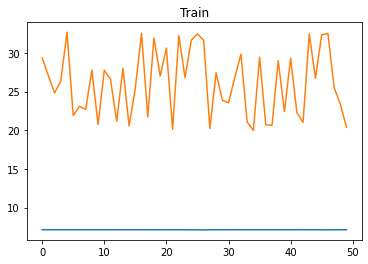

2/2 [==============================] - 10s 32ms/step


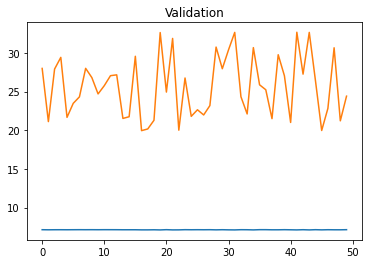

3/3 [==============================] - 0s 10ms/step


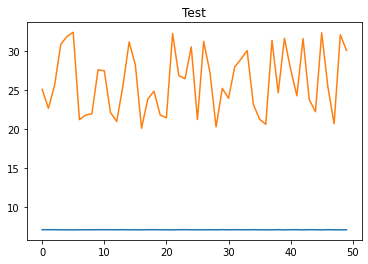

3/3 [==============================] - 0s 34ms/step


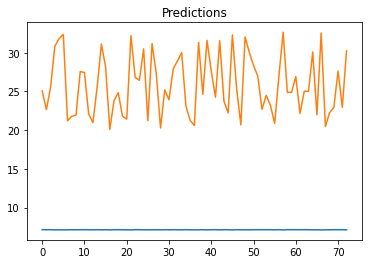

In [45]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [46]:
mavg_hybrid_rnn_gru_mse

366.189000652418

### CNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 614.4545 - root_mean_squared_error: 24.7882

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 145s 15s/step - loss: 614.4545 - root_mean_squared_error: 24.7882 - val_loss: 625.7830 - val_root_mean_squared_error: 25.0157
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 589.1385 - root_mean_squared_error: 24.2722

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 67s 10s/step - loss: 589.1385 - root_mean_squared_error: 24.2722 - val_loss: 600.2816 - val_root_mean_squared_error: 24.5006
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 564.7886 - root_mean_squared_error: 23.7653

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 53s 7s/step - loss: 564.7886 - root_mean_squared_error: 23.7653 - val_loss: 575.6274 - val_root_mean_squared_error: 23.9922
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 541.0887 - root_mean_squared_error: 23.2613

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 74s 11s/step - loss: 541.0887 - root_mean_squared_error: 23.2613 - val_loss: 552.0881 - val_root_mean_squared_error: 23.4966
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 518.7021 - root_mean_squared_error: 22.7750

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 87s 12s/step - loss: 518.7021 - root_mean_squared_error: 22.7750 - val_loss: 530.0272 - val_root_mean_squared_error: 23.0223
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 500.4584 - root_mean_squared_error: 22.3709

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 84s 12s/step - loss: 497.9548 - root_mean_squared_error: 22.3149 - val_loss: 509.6926 - val_root_mean_squared_error: 22.5764
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 478.9696 - root_mean_squared_error: 21.8854

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 107s 15s/step - loss: 478.9696 - root_mean_squared_error: 21.8854 - val_loss: 491.3083 - val_root_mean_squared_error: 22.1655
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 461.7238 - root_mean_squared_error: 21.4878

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 77s 11s/step - loss: 461.7238 - root_mean_squared_error: 21.4878 - val_loss: 474.8099 - val_root_mean_squared_error: 21.7901
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 446.2234 - root_mean_squared_error: 21.1240

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 63s 9s/step - loss: 446.2234 - root_mean_squared_error: 21.1240 - val_loss: 459.9029 - val_root_mean_squared_error: 21.4453
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 432.4572 - root_mean_squared_error: 20.7956

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 59s 8s/step - loss: 432.4572 - root_mean_squared_error: 20.7956 - val_loss: 446.7123 - val_root_mean_squared_error: 21.1356
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 420.1087 - root_mean_squared_error: 20.4966

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 82s 12s/step - loss: 420.1087 - root_mean_squared_error: 20.4966 - val_loss: 435.0206 - val_root_mean_squared_error: 20.8571
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 407.0493 - root_mean_squared_error: 20.1755

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 409.1826 - root_mean_squared_error: 20.2283 - val_loss: 424.6914 - val_root_mean_squared_error: 20.6080
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 399.6581 - root_mean_squared_error: 19.9915

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 84s 12s/step - loss: 399.6581 - root_mean_squared_error: 19.9915 - val_loss: 415.4684 - val_root_mean_squared_error: 20.3830
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 391.0985 - root_mean_squared_error: 19.7762

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 75s 11s/step - loss: 391.0985 - root_mean_squared_error: 19.7762 - val_loss: 407.3548 - val_root_mean_squared_error: 20.1830
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 383.5246 - root_mean_squared_error: 19.5838

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 69s 10s/step - loss: 383.5246 - root_mean_squared_error: 19.5838 - val_loss: 400.1027 - val_root_mean_squared_error: 20.0026
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 376.7574 - root_mean_squared_error: 19.4102

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 67s 9s/step - loss: 376.7574 - root_mean_squared_error: 19.4102 - val_loss: 393.6017 - val_root_mean_squared_error: 19.8394
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 370.6945 - root_mean_squared_error: 19.2534

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 82s 12s/step - loss: 370.6945 - root_mean_squared_error: 19.2534 - val_loss: 387.7150 - val_root_mean_squared_error: 19.6905
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 365.1924 - root_mean_squared_error: 19.1100

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 98s 14s/step - loss: 365.1924 - root_mean_squared_error: 19.1100 - val_loss: 382.4424 - val_root_mean_squared_error: 19.5561
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 360.2726 - root_mean_squared_error: 18.9808

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 63s 9s/step - loss: 360.2726 - root_mean_squared_error: 18.9808 - val_loss: 377.6739 - val_root_mean_squared_error: 19.4338
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 355.8357 - root_mean_squared_error: 18.8636

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 88s 13s/step - loss: 355.8357 - root_mean_squared_error: 18.8636 - val_loss: 373.3241 - val_root_mean_squared_error: 19.3216
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 351.7669 - root_mean_squared_error: 18.7554

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 70s 10s/step - loss: 351.7669 - root_mean_squared_error: 18.7554 - val_loss: 369.4008 - val_root_mean_squared_error: 19.2198
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 349.6784 - root_mean_squared_error: 18.6997

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 73s 10s/step - loss: 348.0838 - root_mean_squared_error: 18.6570 - val_loss: 365.8006 - val_root_mean_squared_error: 19.1259
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 344.6994 - root_mean_squared_error: 18.5661

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 71s 10s/step - loss: 344.6994 - root_mean_squared_error: 18.5661 - val_loss: 362.5246 - val_root_mean_squared_error: 19.0401
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 341.6111 - root_mean_squared_error: 18.4827

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 86s 12s/step - loss: 341.6111 - root_mean_squared_error: 18.4827 - val_loss: 359.5023 - val_root_mean_squared_error: 18.9605
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 338.7776 - root_mean_squared_error: 18.4059

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 73s 10s/step - loss: 338.7776 - root_mean_squared_error: 18.4059 - val_loss: 356.6913 - val_root_mean_squared_error: 18.8863
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 336.1158 - root_mean_squared_error: 18.3335

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 71s 10s/step - loss: 336.1158 - root_mean_squared_error: 18.3335 - val_loss: 354.0704 - val_root_mean_squared_error: 18.8168
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 333.6605 - root_mean_squared_error: 18.2664

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 67s 9s/step - loss: 333.6605 - root_mean_squared_error: 18.2664 - val_loss: 351.6204 - val_root_mean_squared_error: 18.7515
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 331.3328 - root_mean_squared_error: 18.2025

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 82s 12s/step - loss: 331.3328 - root_mean_squared_error: 18.2025 - val_loss: 349.3248 - val_root_mean_squared_error: 18.6902
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 328.6770 - root_mean_squared_error: 18.1294

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 71s 10s/step - loss: 329.1499 - root_mean_squared_error: 18.1425 - val_loss: 347.1372 - val_root_mean_squared_error: 18.6316
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 325.9033 - root_mean_squared_error: 18.0528

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 3s 48ms/step


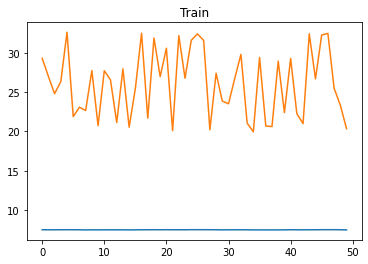

2/2 [==============================] - 3s 28ms/step


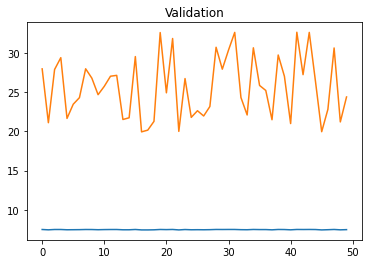

3/3 [==============================] - 0s 16ms/step


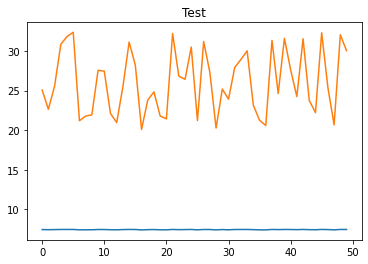

3/3 [==============================] - 0s 18ms/step


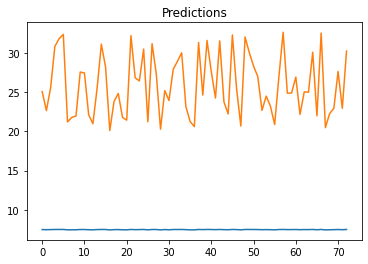

In [47]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [48]:
mavg_hybrid_cnn_gru_mse

353.8400241820626

### CNN RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 611.9850 - root_mean_squared_error: 24.7383

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 110s 8s/step - loss: 611.9850 - root_mean_squared_error: 24.7383 - val_loss: 622.7795 - val_root_mean_squared_error: 24.9555
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 587.5853 - root_mean_squared_error: 24.2402

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 62s 9s/step - loss: 587.5853 - root_mean_squared_error: 24.2402 - val_loss: 599.5215 - val_root_mean_squared_error: 24.4851
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 565.8158 - root_mean_squared_error: 23.7869

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 565.4083 - root_mean_squared_error: 23.7783 - val_loss: 578.0076 - val_root_mean_squared_error: 24.0418
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 544.7687 - root_mean_squared_error: 23.3403

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 544.7687 - root_mean_squared_error: 23.3403 - val_loss: 557.6697 - val_root_mean_squared_error: 23.6150
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 525.3249 - root_mean_squared_error: 22.9200

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 25s 3s/step - loss: 525.3249 - root_mean_squared_error: 22.9200 - val_loss: 538.2975 - val_root_mean_squared_error: 23.2012
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 506.7042 - root_mean_squared_error: 22.5101

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 64s 9s/step - loss: 506.7042 - root_mean_squared_error: 22.5101 - val_loss: 519.8642 - val_root_mean_squared_error: 22.8005
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 489.0341 - root_mean_squared_error: 22.1141

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 73s 10s/step - loss: 489.0341 - root_mean_squared_error: 22.1141 - val_loss: 502.2465 - val_root_mean_squared_error: 22.4109
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 472.0592 - root_mean_squared_error: 21.7269

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 472.0592 - root_mean_squared_error: 21.7269 - val_loss: 485.2580 - val_root_mean_squared_error: 22.0286
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 455.9775 - root_mean_squared_error: 21.3536

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 46s 6s/step - loss: 455.9775 - root_mean_squared_error: 21.3536 - val_loss: 469.4973 - val_root_mean_squared_error: 21.6679
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 441.3253 - root_mean_squared_error: 21.0077

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 53s 8s/step - loss: 441.3253 - root_mean_squared_error: 21.0077 - val_loss: 455.3563 - val_root_mean_squared_error: 21.3391
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 428.0950 - root_mean_squared_error: 20.6905

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 428.0950 - root_mean_squared_error: 20.6905 - val_loss: 442.3806 - val_root_mean_squared_error: 21.0328
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 415.7576 - root_mean_squared_error: 20.3901

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 415.7576 - root_mean_squared_error: 20.3901 - val_loss: 430.3044 - val_root_mean_squared_error: 20.7438
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 404.2520 - root_mean_squared_error: 20.1060

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 76s 11s/step - loss: 404.2520 - root_mean_squared_error: 20.1060 - val_loss: 418.8455 - val_root_mean_squared_error: 20.4657
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 394.6860 - root_mean_squared_error: 19.8667

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 393.3202 - root_mean_squared_error: 19.8323 - val_loss: 407.8961 - val_root_mean_squared_error: 20.1964
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 382.8087 - root_mean_squared_error: 19.5655

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 382.8087 - root_mean_squared_error: 19.5655 - val_loss: 397.3625 - val_root_mean_squared_error: 19.9340
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 372.7105 - root_mean_squared_error: 19.3057

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 372.7105 - root_mean_squared_error: 19.3057 - val_loss: 387.0250 - val_root_mean_squared_error: 19.6730
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 362.7216 - root_mean_squared_error: 19.0453

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 362.7216 - root_mean_squared_error: 19.0453 - val_loss: 376.8388 - val_root_mean_squared_error: 19.4123
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 352.8003 - root_mean_squared_error: 18.7830

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 352.8003 - root_mean_squared_error: 18.7830 - val_loss: 366.7549 - val_root_mean_squared_error: 19.1508
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 343.1065 - root_mean_squared_error: 18.5231

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 72s 10s/step - loss: 343.1065 - root_mean_squared_error: 18.5231 - val_loss: 356.7572 - val_root_mean_squared_error: 18.8880
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 333.4371 - root_mean_squared_error: 18.2603

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 333.4371 - root_mean_squared_error: 18.2603 - val_loss: 347.0804 - val_root_mean_squared_error: 18.6301
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 324.0315 - root_mean_squared_error: 18.0009

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 32s 4s/step - loss: 324.0315 - root_mean_squared_error: 18.0009 - val_loss: 337.8599 - val_root_mean_squared_error: 18.3810
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 315.2103 - root_mean_squared_error: 17.7542

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 315.2103 - root_mean_squared_error: 17.7542 - val_loss: 329.1573 - val_root_mean_squared_error: 18.1427
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 306.9117 - root_mean_squared_error: 17.5189

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 306.9117 - root_mean_squared_error: 17.5189 - val_loss: 321.0338 - val_root_mean_squared_error: 17.9174
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 300.5172 - root_mean_squared_error: 17.3354

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 53s 7s/step - loss: 299.1563 - root_mean_squared_error: 17.2961 - val_loss: 313.3388 - val_root_mean_squared_error: 17.7014
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 291.8714 - root_mean_squared_error: 17.0842

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 291.8714 - root_mean_squared_error: 17.0842 - val_loss: 306.0681 - val_root_mean_squared_error: 17.4948
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 284.9837 - root_mean_squared_error: 16.8815

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 284.9837 - root_mean_squared_error: 16.8815 - val_loss: 299.2321 - val_root_mean_squared_error: 17.2983
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 275.5161 - root_mean_squared_error: 16.5987

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 59s 8s/step - loss: 278.5846 - root_mean_squared_error: 16.6909 - val_loss: 292.8451 - val_root_mean_squared_error: 17.1127
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 272.6128 - root_mean_squared_error: 16.5110

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 272.6128 - root_mean_squared_error: 16.5110 - val_loss: 286.8395 - val_root_mean_squared_error: 16.9363
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 267.0106 - root_mean_squared_error: 16.3405

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 267.0106 - root_mean_squared_error: 16.3405 - val_loss: 281.2946 - val_root_mean_squared_error: 16.7718
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 261.8024 - root_mean_squared_error: 16.1803

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 11s 63ms/step


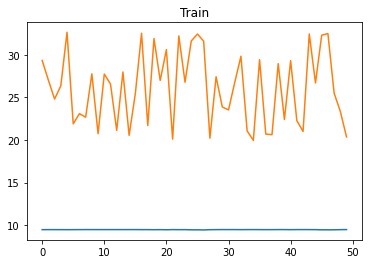

2/2 [==============================] - 2s 23ms/step


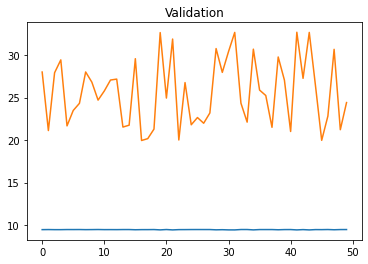

3/3 [==============================] - 0s 76ms/step


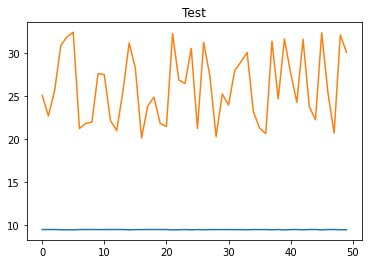

3/3 [==============================] - 0s 10ms/step


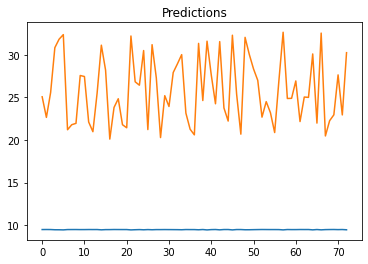

In [49]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [50]:
mavg_hybrid_cnn_rnn_gru_mse

284.0222860583294

### RNN LSTM GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 637.8164 - root_mean_squared_error: 25.2550

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 146s 14s/step - loss: 637.8164 - root_mean_squared_error: 25.2550 - val_loss: 653.5300 - val_root_mean_squared_error: 25.5642
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 619.2091 - root_mean_squared_error: 24.8839

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 619.2091 - root_mean_squared_error: 24.8839 - val_loss: 634.2383 - val_root_mean_squared_error: 25.1841
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 600.0041 - root_mean_squared_error: 24.4950

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 600.0041 - root_mean_squared_error: 24.4950 - val_loss: 613.8309 - val_root_mean_squared_error: 24.7756
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 576.4048 - root_mean_squared_error: 24.0084

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 579.3531 - root_mean_squared_error: 24.0698 - val_loss: 591.4943 - val_root_mean_squared_error: 24.3207
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 556.6052 - root_mean_squared_error: 23.5925

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 59s 8s/step - loss: 556.6052 - root_mean_squared_error: 23.5925 - val_loss: 566.4933 - val_root_mean_squared_error: 23.8011
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 531.3067 - root_mean_squared_error: 23.0501

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 59s 8s/step - loss: 531.3067 - root_mean_squared_error: 23.0501 - val_loss: 538.7243 - val_root_mean_squared_error: 23.2104
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 503.0544 - root_mean_squared_error: 22.4289

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 72s 10s/step - loss: 503.0544 - root_mean_squared_error: 22.4289 - val_loss: 508.3646 - val_root_mean_squared_error: 22.5469
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 472.6562 - root_mean_squared_error: 21.7407

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 472.6562 - root_mean_squared_error: 21.7407 - val_loss: 475.9811 - val_root_mean_squared_error: 21.8170
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 440.7204 - root_mean_squared_error: 20.9933

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 57s 8s/step - loss: 440.7204 - root_mean_squared_error: 20.9933 - val_loss: 443.2937 - val_root_mean_squared_error: 21.0545
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 409.3512 - root_mean_squared_error: 20.2324

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 409.3512 - root_mean_squared_error: 20.2324 - val_loss: 412.3572 - val_root_mean_squared_error: 20.3066
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 380.7383 - root_mean_squared_error: 19.5125

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 380.7383 - root_mean_squared_error: 19.5125 - val_loss: 385.0909 - val_root_mean_squared_error: 19.6237
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 355.9319 - root_mean_squared_error: 18.8662

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 53s 8s/step - loss: 355.9319 - root_mean_squared_error: 18.8662 - val_loss: 362.4801 - val_root_mean_squared_error: 19.0389
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 337.7060 - root_mean_squared_error: 18.3768

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 335.7863 - root_mean_squared_error: 18.3245 - val_loss: 344.5083 - val_root_mean_squared_error: 18.5609
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 319.5324 - root_mean_squared_error: 17.8755

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 319.8418 - root_mean_squared_error: 17.8841 - val_loss: 330.4438 - val_root_mean_squared_error: 18.1781
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 307.3914 - root_mean_squared_error: 17.5326

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 307.3914 - root_mean_squared_error: 17.5326 - val_loss: 319.3330 - val_root_mean_squared_error: 17.8699
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 297.5389 - root_mean_squared_error: 17.2493

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 297.5389 - root_mean_squared_error: 17.2493 - val_loss: 310.4253 - val_root_mean_squared_error: 17.6189
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 288.8044 - root_mean_squared_error: 16.9942

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 289.4729 - root_mean_squared_error: 17.0139 - val_loss: 303.1816 - val_root_mean_squared_error: 17.4121
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 281.3676 - root_mean_squared_error: 16.7740

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 66s 9s/step - loss: 282.9843 - root_mean_squared_error: 16.8221 - val_loss: 297.1453 - val_root_mean_squared_error: 17.2379
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 277.4839 - root_mean_squared_error: 16.6579

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 277.4839 - root_mean_squared_error: 16.6579 - val_loss: 292.0318 - val_root_mean_squared_error: 17.0889
Epoch 20/30
6/8 [=====================>........] - ETA: 0s - loss: 270.0018 - root_mean_squared_error: 16.4317

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 59s 8s/step - loss: 272.8419 - root_mean_squared_error: 16.5179 - val_loss: 287.6229 - val_root_mean_squared_error: 16.9594
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 268.7886 - root_mean_squared_error: 16.3948

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 268.7886 - root_mean_squared_error: 16.3948 - val_loss: 283.7379 - val_root_mean_squared_error: 16.8445
Epoch 22/30
6/8 [=====================>........] - ETA: 0s - loss: 265.3682 - root_mean_squared_error: 16.2901

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 265.1691 - root_mean_squared_error: 16.2840 - val_loss: 280.2251 - val_root_mean_squared_error: 16.7399
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 261.1587 - root_mean_squared_error: 16.1604

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 261.9085 - root_mean_squared_error: 16.1836 - val_loss: 277.0208 - val_root_mean_squared_error: 16.6439
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 258.8976 - root_mean_squared_error: 16.0903

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 258.8976 - root_mean_squared_error: 16.0903 - val_loss: 274.0447 - val_root_mean_squared_error: 16.5543
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 256.0927 - root_mean_squared_error: 16.0029

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 256.0927 - root_mean_squared_error: 16.0029 - val_loss: 271.2740 - val_root_mean_squared_error: 16.4704
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 253.4692 - root_mean_squared_error: 15.9207

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 69s 10s/step - loss: 253.4692 - root_mean_squared_error: 15.9207 - val_loss: 268.6527 - val_root_mean_squared_error: 16.3906
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 251.0052 - root_mean_squared_error: 15.8431

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 251.0052 - root_mean_squared_error: 15.8431 - val_loss: 266.1518 - val_root_mean_squared_error: 16.3142
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 246.6160 - root_mean_squared_error: 15.7040

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 248.6215 - root_mean_squared_error: 15.7677 - val_loss: 263.7573 - val_root_mean_squared_error: 16.2406
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 246.3425 - root_mean_squared_error: 15.6953

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 246.3425 - root_mean_squared_error: 15.6953 - val_loss: 261.4420 - val_root_mean_squared_error: 16.1692
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 245.8109 - root_mean_squared_error: 15.6784

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 4s 20ms/step


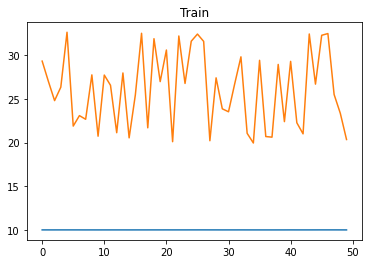

2/2 [==============================] - 3s 72ms/step


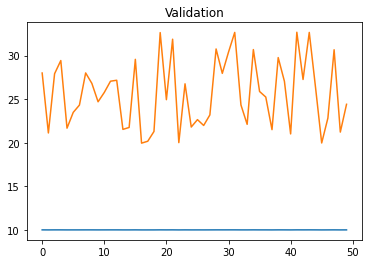

3/3 [==============================] - 1s 261ms/step


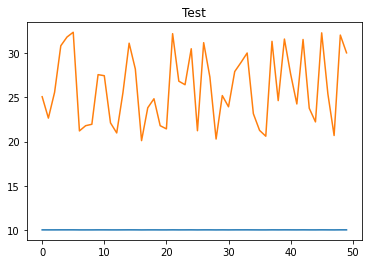

3/3 [==============================] - 0s 9ms/step


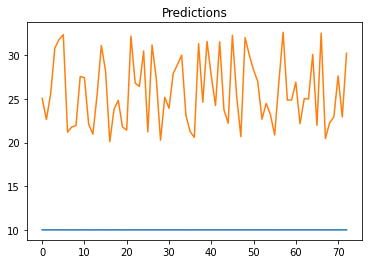

In [51]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [52]:
mavg_hybrid_lstm_rnn_gru_mse

266.9088806677947

# MSE

In [53]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]
msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [54]:
msedf

,Model,MSE,RMSE
0,cnn,425.996038,20.639671
1,rnn,464.048468,21.541784
2,gru,498.402738,22.324935
3,lstm,634.130398,25.181946
4,mvg_cnn,684.383446,26.160723
5,mvg_rnn,508.927732,22.559427
6,mvg_gru,443.849984,21.067747
7,mvg_lstm,503.071835,22.429263
8,auto_cnn,5.133449,2.265712
9,auto_rnn,443.509708,21.059670


In [55]:
msedf.to_csv("msedf.csv", index= False)

<AxesSubplot:xlabel='Model'>

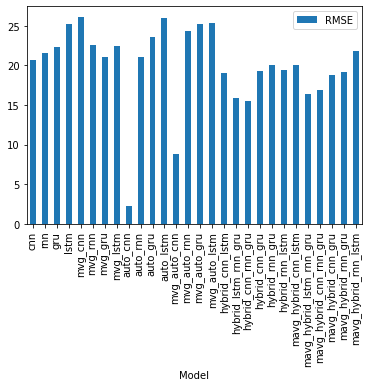

In [56]:
msedf.plot("Model", "RMSE", kind= "bar")

In [57]:
np.save("x_train.npy", x_train)
np.save("y_train.npy", y_train)
np.save("x_test.npy", x_test)
np.save("y_test.npy", y_test)
np.save("x_val.npy", x_val)
np.save("y_val.npy", y_val)